<h1 align='center'> 
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />
</h1>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2022 </h1>

<H3 align='center'> Taller 2 - Redes Neuronales y Deep Learning </H3>
<hr style="height:2px;border:none"/>


# Temas  

* Técnicas Especiales para Entrenamiento y Regularización. 
* Redes Recurrentes y Atención.

# Reglas & Formalidades

* Se deben formar equipos de 3 personas. En caso de problemas para formar equipos contacten a sus profesores y ayudantes.  
* En caso de modificaciones, los equipos deben ser re-inscritos antes del 30 de mayo usando el link enviado para la entrega anterior.
* Se debe respetar el Código de Honor del curso y del DI (Syllabus). Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios o papers, mencionando al autor y entregando un link a la fuente. 
* Si resultara necesaria la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está muy bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 


> * **Video:** Se debe preparar un video explicativo de **máximo 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo + video-conferencia:** Personas que deben asistir presencialmente el día de clases agendado para la discusión del taller serán sorteadas. Ese día se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.



# Video

Se adjunta link asociado a video explicativo [aquí](https://drive.google.com/drive/folders/1BhL83Fou2cG3vZfcOsnNwYn3jEbRFV9j?usp=sharing)

# Conformidad Ética

Durante la realización de esta evaluación se trabajó en equipo.

# Fechas

> * Defensas: 10 de Junio, horario de clases.
> * Fecha de entrega de vídeo: 11 de Junio 23:00 Hrs.
> * Fecha de entrega de Jupyter (notebook): debe haber un borrador completo (o casi) el 09 de Junio, pero se puede modificar la entrega hasta el 11 de Junio 23:00 Hrs.


# Parte I - Pregunta de Investigación

Refute o evidencie experimentalmente una de las siguientes afirmaciones.

Elegir tema acá **usando el nombre del equipo**:

https://doodle.com/poll/qgw7h5xb72khqq9x?utm_source=poll&utm_medium=link

**Atención:** Se debe validar o refutar la hipótesis usando como mínimo **2 datasets** reales. Estos datasets pueden ser modificados o alterados si la investigación lo amerita. **En caso de conclusiones poco claras o poco interesantes, se valora la inclusión de un tercer caso.**

> 6. En problemas de clasificación de imágenes con pocos ejemplos de entrenamiento, el fine-tuning de una CNN pre-entrenada produce mejores resultados que entrenar una CNN desde cero. El beneficio aumenta de modo inversamente proporcional al número de ejemplos de entrenamiento disponibles. 



## Preparación de la data

In [ ]:
import pandas as pd

import numpy as np
from pathlib import Path
import keras 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

from keras.layers import GlobalAveragePooling2D
from keras import layers
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = Path('drive/MyDrive/natural_images')

Se hace el dataframe agregando los nombres de las imágenes de entrenamiento

In [ ]:
moto_dir = train_dir / 'motorbike'
flower_dir = train_dir / 'flower'
person_dir = train_dir / 'person'
cat_dir = train_dir / 'cat'
car_dir = train_dir / 'car'
dog_dir = train_dir / 'dog'
airplane_dir = train_dir / 'airplane'
fruit_dir = train_dir / 'fruit'







#lista de las imagenes usando el path a las carpetas 
moto_cases = moto_dir.glob('*.jpg') 
flower_cases = flower_dir.glob('*.jpg')
person_cases = person_dir.glob('*.jpg')
cat_cases = cat_dir.glob('*.jpg')
car_cases = car_dir.glob('*.jpg')
dog_cases = dog_dir.glob('*.jpg')
airplane_cases = airplane_dir.glob('*.jpg')
fruit_cases = fruit_dir.glob('*.jpg')


#se almacenan en una lista con labels para hacerlo dataframe

dataframe = []


for image in moto_cases:
  dataframe.append((str(image),'moto'))

for image in flower_cases:
  dataframe.append((str(image),'flower'))

for image in person_cases:
  dataframe.append((str(image),'person'))
for image in cat_cases:
  dataframe.append((str(image),'cat'))
for image in car_cases:
  dataframe.append((str(image),'car'))
for image in dog_cases:
  dataframe.append((str(image),'dog'))
for image in airplane_cases:
  dataframe.append((str(image),'airplane'))
for image in fruit_cases:
  dataframe.append((str(image),'fruit'))  



#se hace dataframe

dataframe = pd.DataFrame(dataframe, columns=["image", 'label'],index=None)
dataframe = dataframe.sample(frac=1.).reset_index(drop=True) #se mezclan 
dataframe.head()

,image,label
0,drive/MyDrive/natural_images/airplane/airplane...,airplane
1,drive/MyDrive/natural_images/person/person_091...,person
2,drive/MyDrive/natural_images/cat/cat_0311.jpg,cat
3,drive/MyDrive/natural_images/cat/cat_0826.jpg,cat
4,drive/MyDrive/natural_images/car/car_0209.jpg,car


##Se preparan dataframes de validation, train y test

In [ ]:
dataframe_train, dataframe_test = train_test_split(dataframe, stratify = dataframe.label, train_size=0.8)

In [ ]:
dataframe_train, dataframe_val = train_test_split(dataframe_train, stratify = dataframe_train.label, train_size=0.75)

In [ ]:
print(dataframe_train.shape)
print(dataframe_val.shape)
print(dataframe_test.shape)

(4139, 2)
(1380, 2)
(1380, 2)


##Se preparan tres dataframes de entrenamiento con menos cantidad de imagenes 

In [ ]:
dataframe_train_2,_ = train_test_split(dataframe_train, stratify = dataframe_train.label, train_size=0.6)

In [ ]:
print(dataframe_train_2.shape)

(2483, 2)


In [ ]:
dataframe_train_3, _ = train_test_split(dataframe_train_2, stratify = dataframe_train_2.label, train_size=0.6)

In [ ]:
print(dataframe_train_3.shape)

(1489, 2)


In [ ]:
dataframe_train_4, _ = train_test_split(dataframe_train_3, stratify = dataframe_train_3.label, train_size=0.5)

In [ ]:
print(dataframe_train_4.shape)

(744, 2)


In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()

#directory es vacio ya que el dataframe ya tiene el path de las imagenes
train_generator = train_datagen.flow_from_dataframe(
        dataframe_train,
        directory='',
        x_col = 'image',
        y_col = 'label',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode="categorical") 
##categorical default

Found 4139 validated image filenames belonging to 8 classes.


In [ ]:
train_generator_2 = train_datagen.flow_from_dataframe(
        dataframe_train_2,
        directory='',
        x_col = 'image',
        y_col = 'label',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode="categorical") 

Found 2483 validated image filenames belonging to 8 classes.


In [ ]:
train_generator_3 = train_datagen.flow_from_dataframe(
        dataframe_train_3,
        directory='',
        x_col = 'image',
        y_col = 'label',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode="categorical") 

Found 1489 validated image filenames belonging to 8 classes.


In [ ]:
train_generator_4 = train_datagen.flow_from_dataframe(
        dataframe_train_4,
        directory='',
        x_col = 'image',
        y_col = 'label',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode="categorical") 

Found 744 validated image filenames belonging to 8 classes.


## Test

In [ ]:
test_datagen = keras.preprocessing.image.ImageDataGenerator()

#directory es vacio ya que el dataframe ya tiene el path de las imagenes
test_generator = test_datagen.flow_from_dataframe(
        dataframe_test,
        directory='',
        x_col = 'image',
        y_col = 'label',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode="categorical") 

Found 1380 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


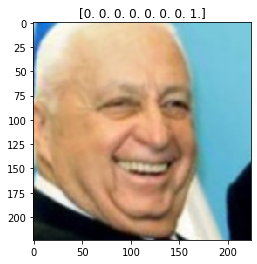

In [ ]:
for a in test_generator:
  plt.imshow(a[0][0]/255)
  plt.title(a[1][0])
  break

## Validation 

In [ ]:
val_datagen = keras.preprocessing.image.ImageDataGenerator()

#directory es vacio ya que el dataframe ya tiene el path de las imagenes
val_generator = val_datagen.flow_from_dataframe(
        dataframe_val,
        directory='',
        x_col = 'image',
        y_col = 'label',
        target_size=(224, 224),
        batch_size=32,
        shuffle=False,
        class_mode="categorical") 

Found 1380 validated image filenames belonging to 8 classes.


(224, 224, 3)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


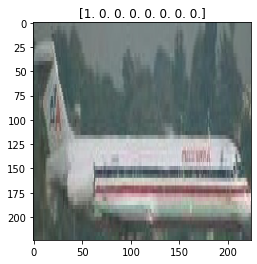

In [ ]:
for a in val_generator:
  plt.imshow(a[0][0]/255)
  print(a[0][0].shape)
  plt.title(a[1][0])
  break

##Codigo grafica de accuracy y loss

In [ ]:
def graf_fit(history):
  fig, axis = plt.subplots(1, 2, figsize=(18,8))
  axis[0].plot(history.history['val_accuracy'], label='val_acc')
  axis[0].plot(history.history['accuracy'], label='train_acc')
  axis[0].set_title("Accuracy")
  axis[0].legend()
  axis[1].plot(history.history['loss'], label='loss')
  axis[1].plot(history.history['val_loss'], label='val_loss')
  axis[1].set_title("Loss en entrenamiento")
  axis[1].legend()
  plt.show()

### EfficientNet B0 resolution 224

###Pre-entrenado 

In [ ]:

inputs = layers.Input(shape=(224, 224, 3))

model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
aux = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
aux = layers.BatchNormalization()(aux)

top_dropout_rate = 0.2
aux = layers.Dropout(top_dropout_rate, name="top_dropout")(aux)
#(numero de clases, activacion, name)
outputs = layers.Dense(8, activation="softmax", name="pred")(aux)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPa

In [ ]:
model_2_pre = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

# Freeze the pretrained weights
model_2_pre.trainable = False

# Rebuild top
aux_2_pre = layers.GlobalAveragePooling2D(name="avg_pool")(model_2_pre.output)
aux_2_pre = layers.BatchNormalization()(aux_2_pre)

top_dropout_rate = 0.2
aux_2_pre = layers.Dropout(top_dropout_rate, name="top_dropout")(aux_2_pre)
#(numero de clases, activacion, name)
outputs_2_pre = layers.Dense(8, activation="softmax", name="pred")(aux_2_pre)

# Compile
model_2_pre = tf.keras.Model(inputs, outputs_2_pre, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_pre.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_2_pre.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                       

In [ ]:
model_3_pre = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

# Freeze the pretrained weights
model_3_pre.trainable = False

# Rebuild top
aux_3_pre = layers.GlobalAveragePooling2D(name="avg_pool")(model_3_pre.output)
aux_3_pre = layers.BatchNormalization()(aux_3_pre)

top_dropout_rate = 0.2
aux_3_pre = layers.Dropout(top_dropout_rate, name="top_dropout")(aux_3_pre)
#(numero de clases, activacion, name)
outputs_3_pre = layers.Dense(8, activation="softmax", name="pred")(aux_3_pre)

# Compile
model_3_pre = tf.keras.Model(inputs, outputs_3_pre, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3_pre.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_3_pre.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                       

In [ ]:
model_4_pre = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")

# Freeze the pretrained weights
model_4_pre.trainable = False

# Rebuild top
aux_4_pre = layers.GlobalAveragePooling2D(name="avg_pool")(model_4_pre.output)
aux_4_pre = layers.BatchNormalization()(aux_4_pre)

top_dropout_rate = 0.2
aux_4_pre = layers.Dropout(top_dropout_rate, name="top_dropout")(aux_4_pre)
#(numero de clases, activacion, name)
outputs_4_pre = layers.Dense(8, activation="softmax", name="pred")(aux_4_pre)

# Compile
model_4_pre = tf.keras.Model(inputs, outputs_4_pre, name="EfficientNet")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_4_pre.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_4_pre.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                       

Entrenamiento de modelos pre-entrenados 

In [ ]:
hist_1_pre = model.fit(train_generator,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    validation_steps=10,
                    epochs=3
)

Epoch 1/3
10/10 [==============================] - 156s 15s/step - loss: 1.7464 - accuracy: 0.4406 - val_loss: 1.1576 - val_accuracy: 0.8594
Epoch 2/3
10/10 [==============================] - 70s 7s/step - loss: 0.3648 - accuracy: 0.8813 - val_loss: 0.6469 - val_accuracy: 0.9531
Epoch 3/3
10/10 [==============================] - 73s 7s/step - loss: 0.1827 - accuracy: 0.9375 - val_loss: 0.4319 - val_accuracy: 0.9719


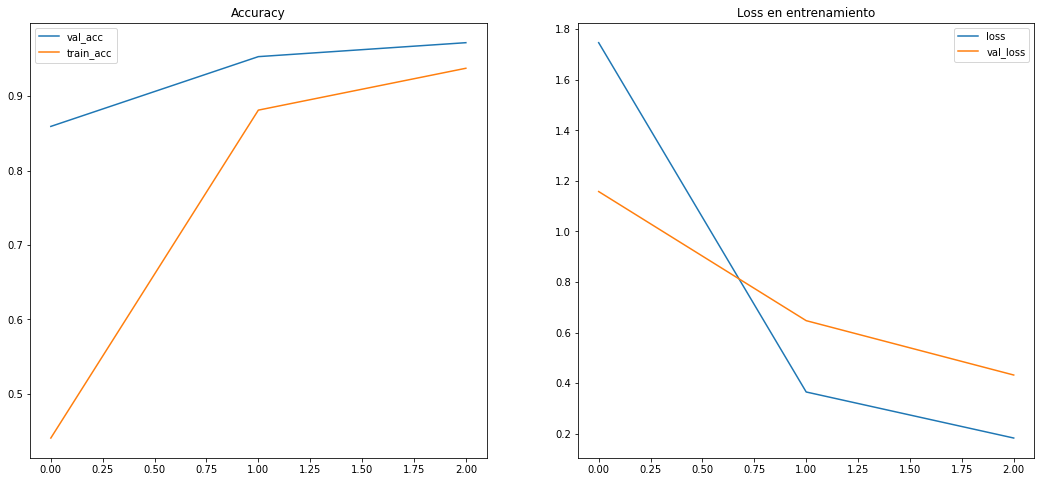

In [ ]:
graf_fit(hist_1_pre)

In [ ]:
model.save('drive/MyDrive/natural_images/model_pre_1.h5')

In [ ]:
hist_2_pre = model_2_pre.fit(train_generator_2,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    validation_steps=10,
                    epochs=3
)

Epoch 1/3
10/10 [==============================] - 60s 5s/step - loss: 1.6962 - accuracy: 0.4812 - val_loss: 1.1982 - val_accuracy: 0.8219
Epoch 2/3
10/10 [==============================] - 49s 5s/step - loss: 0.3263 - accuracy: 0.9281 - val_loss: 0.6745 - val_accuracy: 0.9531
Epoch 3/3
10/10 [==============================] - 34s 3s/step - loss: 0.1511 - accuracy: 0.9656 - val_loss: 0.4579 - val_accuracy: 0.9750


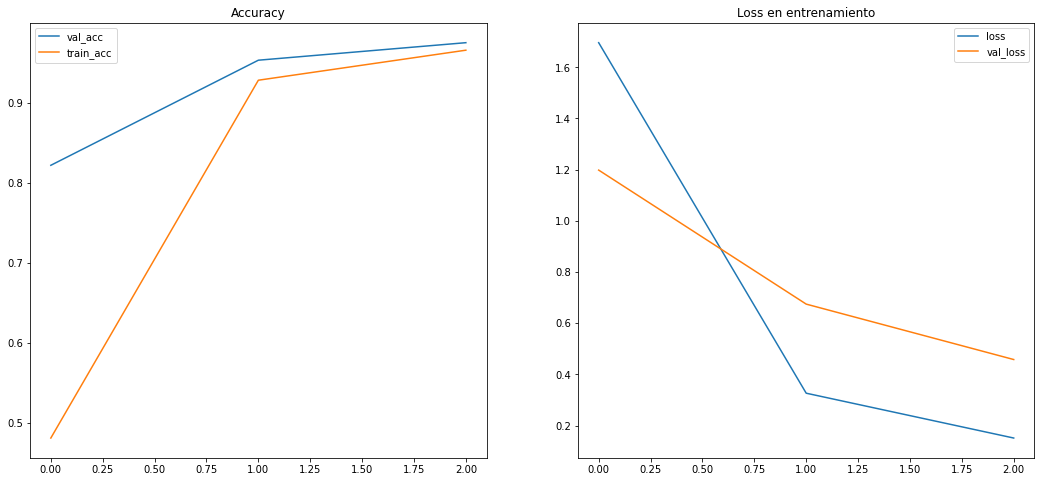

In [ ]:
graf_fit(hist_2_pre)

In [ ]:
model_2_pre.save('drive/MyDrive/natural_images/model_pre_2.h5')

In [ ]:
hist_3_pre = model_3_pre.fit(train_generator_3,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    validation_steps=10,
                    epochs=3
)

Epoch 1/3
10/10 [==============================] - 39s 3s/step - loss: 1.8498 - accuracy: 0.3750 - val_loss: 1.2444 - val_accuracy: 0.8281
Epoch 2/3
10/10 [==============================] - 26s 3s/step - loss: 0.3838 - accuracy: 0.8875 - val_loss: 0.7079 - val_accuracy: 0.9250
Epoch 3/3
10/10 [==============================] - 20s 2s/step - loss: 0.1213 - accuracy: 0.9719 - val_loss: 0.4884 - val_accuracy: 0.9531


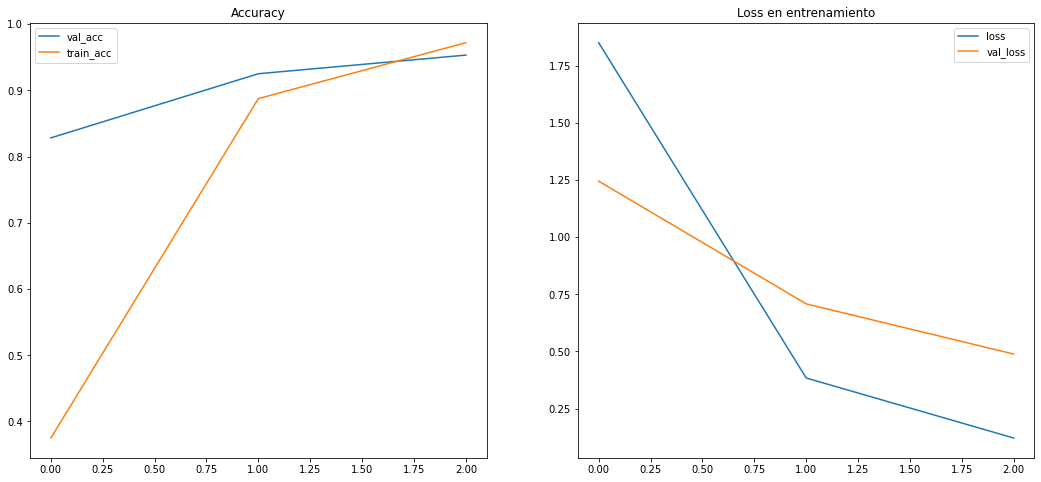

In [ ]:
graf_fit(hist_3_pre)

In [ ]:
model_3_pre.save('drive/MyDrive/natural_images/model_pre_3.h5')

In [ ]:
hist_4_pre = model_4_pre.fit(train_generator_4,
                    steps_per_epoch=10,
                    validation_data=val_generator,
                    validation_steps=10,
                    epochs=3
)

Epoch 1/3
10/10 [==============================] - 27s 2s/step - loss: 1.9743 - accuracy: 0.3716 - val_loss: 1.3048 - val_accuracy: 0.7750
Epoch 2/3
10/10 [==============================] - 11s 981ms/step - loss: 0.4222 - accuracy: 0.8844 - val_loss: 0.7588 - val_accuracy: 0.9156
Epoch 3/3
10/10 [==============================] - 7s 730ms/step - loss: 0.1508 - accuracy: 0.9628 - val_loss: 0.5192 - val_accuracy: 0.9594


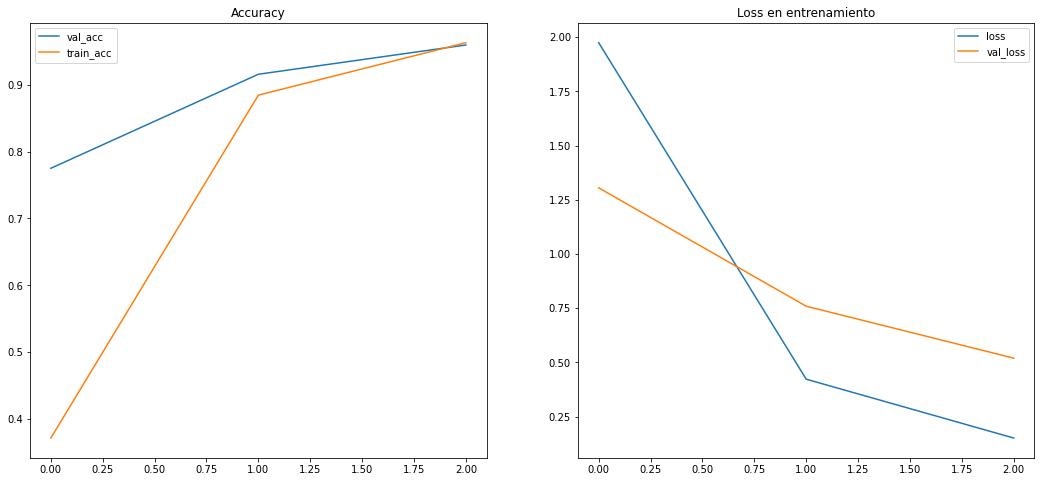

In [ ]:
graf_fit(hist_4_pre)

In [ ]:
model_4_pre.save('drive/MyDrive/natural_images/model_pre_4.h5')

##Predicciones pre-entrenados

In [ ]:
predictions = model.predict(test_generator, verbose = 1)
enetB0_pred_classes = np.argmax(predictions, axis=1)

44/44 [==============================] - 303s 7s/step


In [ ]:
predictions_2_pre = model_2_pre.predict(test_generator, verbose = 1)
enetB0_pred_classes_2_pre = np.argmax(predictions_2_pre, axis=1)

44/44 [==============================] - 7s 121ms/step


In [ ]:
predictions_3_pre = model_3_pre.predict( test_generator, verbose = 1)
enetB0_pred_classes_3_pre = np.argmax(predictions_3_pre, axis=1)

44/44 [==============================] - 8s 143ms/step


In [ ]:
predictions_4_pre = model_4_pre.predict (test_generator, verbose = 1)
enetB0_pred_classes_4_pre = np.argmax(predictions_4_pre, axis=1)

44/44 [==============================] - 8s 147ms/step


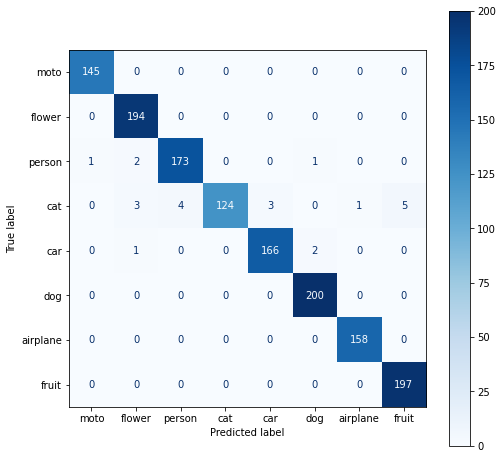

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes, average='macro')

(0.9846225283797863, 0.980670492045981, 0.9821560832933673, None)

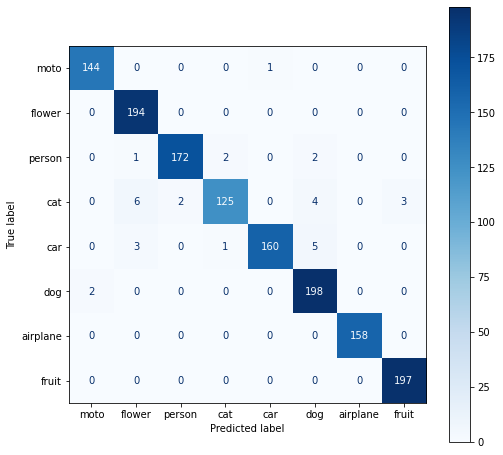

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_2_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)


plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_2_pre, average='macro')

(0.9785634062593401, 0.9743071957115701, 0.9759766685024358, None)

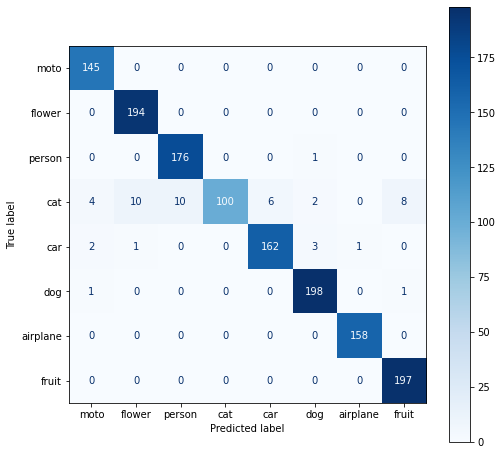

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_3_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_3_pre, average='macro')

(0.9664275889988567, 0.9571519848035493, 0.9585034536207178, None)

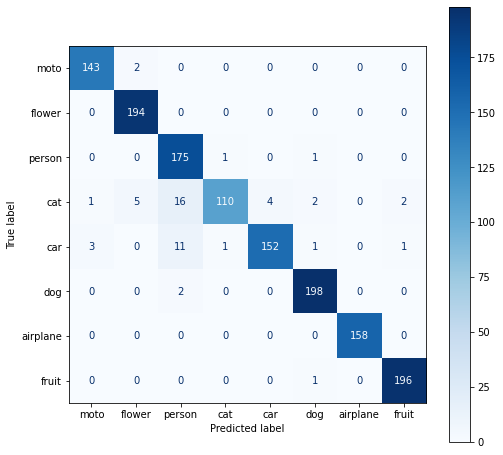

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_4_pre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_4_pre, average='macro')

(0.9640752868749853, 0.9556192361411813, 0.9576619322078981, None)

##Entrenos de cero 

In [ ]:

inputs = layers.Input(shape=(224, 224, 3))
x = inputs
outputs = EfficientNetB0(include_top=True, weights=None, classes=8)(x)

model_cero = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_cero.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

model_cero.summary()

epochs = 10 
hist_1_cero = model_cero.fit(train_generator, epochs=epochs, validation_data=val_generator,steps_per_epoch=100,
                 verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 8)                4059819   
                                                                 
Total params: 4,059,819
Trainable params: 4,017,796
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 567s 6s/step - loss: 2.1272 - accuracy: 0.4486 - val_loss: 2.7943 - val_accuracy: 0.1428
Epoch 2/10
100/100 [==============================] - 118s 1s/step - loss: 1.2188 - accuracy: 0.6351 - val_loss: 4.2273 - val_accuracy: 0.1428
Epoch 3/10
100/100 [==============================] - 44s 442ms/step - loss: 0.8751 - accuracy: 0.7443 - val_loss: 5.0470 - val_accuracy: 0.2500
Epoch 4/10


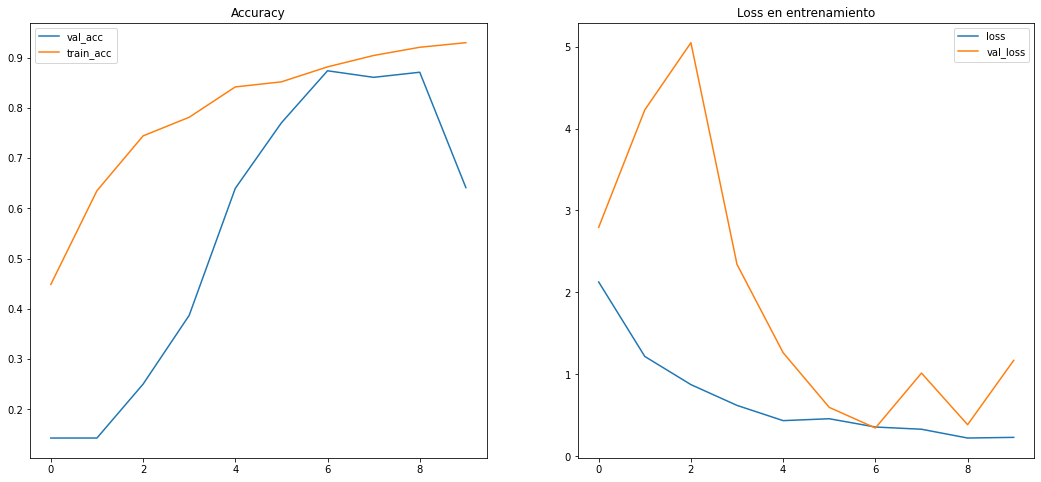

In [ ]:
graf_fit(hist_1_cero)

In [ ]:
model_cero.save('drive/MyDrive/natural_images/model_cero_1.h5')

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = inputs
outputs = EfficientNetB0(include_top=True, weights=None, classes=8)(x)

model_cero_2 = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_cero_2.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

model_cero_2.summary()

epochs = 10  
hist_2_cero = model_cero_2.fit(train_generator_2, epochs=epochs, validation_data=val_generator,steps_per_epoch=78,
                 verbose=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 8)                4059819   
                                                                 
Total params: 4,059,819
Trainable params: 4,017,796
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/10
78/78 [==============================] - 40s 404ms/step - loss: 2.1476 - accuracy: 0.4414 - val_loss: 2.8720 - val_accuracy: 0.1283
Epoch 2/10
78/78 [==============================] - 29s 373ms/step - loss: 1.3915 - accuracy: 0.5812 - val_loss: 2.8116 - val_accuracy: 0.1304
Epoch 3/10
78/78 [==============================] - 29s 372ms/step - loss: 0.9896 - accuracy: 0.7004 - val_loss: 4.0157 - val_accuracy: 0.1522
Epoch 4/10


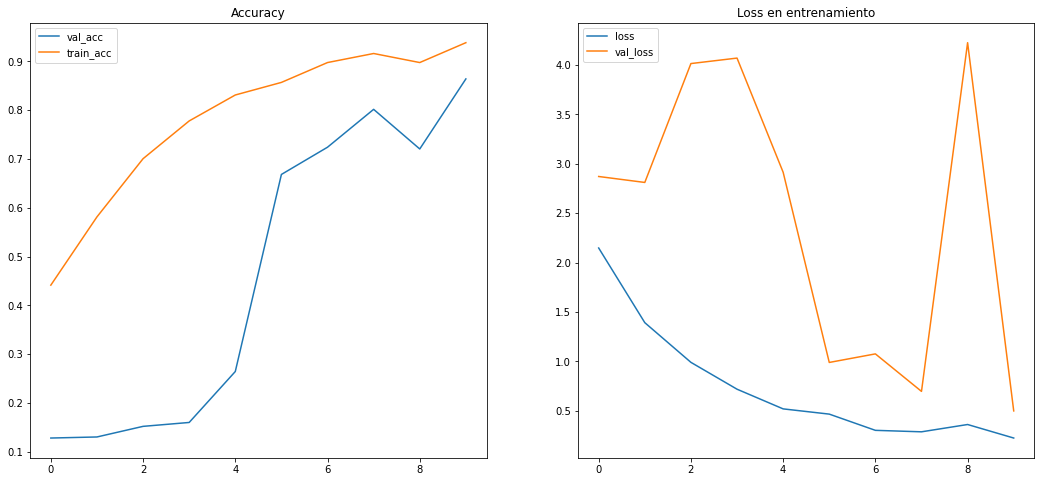

In [ ]:
graf_fit(hist_2_cero)

In [ ]:
model_cero_2.save('drive/MyDrive/natural_images/model_cero_2.h5')

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = inputs
outputs = EfficientNetB0(include_top=True, weights=None, classes=8)(x)

model_cero_3 = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_cero_3.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

model_cero_3.summary()

epochs = 10  
hist_3_cero = model_cero_3.fit(train_generator_3, epochs=epochs, validation_data=val_generator,steps_per_epoch=47,
                 verbose=1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 8)                4059819   
                                                                 
Total params: 4,059,819
Trainable params: 4,017,796
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/10
47/47 [==============================] - 31s 474ms/step - loss: 2.3501 - accuracy: 0.3848 - val_loss: 2.5090 - val_accuracy: 0.1428
Epoch 2/10
47/47 [==============================] - 20s 416ms/step - loss: 1.5083 - accuracy: 0.5198 - val_loss: 3.7011 - val_accuracy: 0.1428
Epoch 3/10
47/47 [==============================] - 20s 417ms/step - loss: 1.3138 - accuracy: 0.6011 - val_loss: 2.8594 - val_accuracy: 0.2362
Epoch 4/10


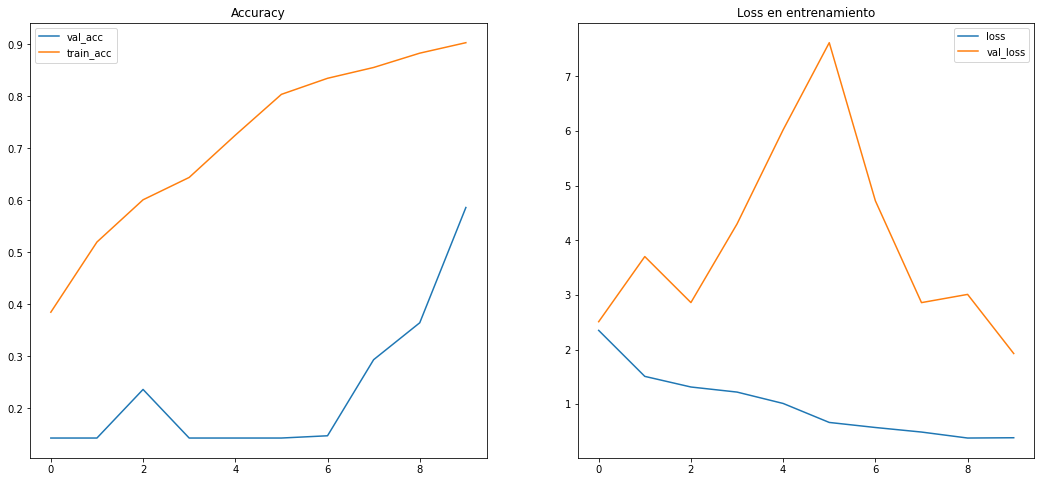

In [ ]:
graf_fit(hist_3_cero)

In [ ]:
model_cero_3.save('drive/MyDrive/natural_images/model_cero_3.h5')

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = inputs
outputs = EfficientNetB0(include_top=True, weights=None, classes=8)(x)

model_cero_4 = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_cero_4.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

model_cero_4.summary()

epochs = 7  
hist_4_cero = model_cero_4.fit(train_generator_4, epochs=epochs, validation_data=val_generator,steps_per_epoch=24,
                 verbose=1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 8)                4059819   
                                                                 
Total params: 4,059,819
Trainable params: 4,017,796
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/7
24/24 [==============================] - 22s 604ms/step - loss: 2.8750 - accuracy: 0.3038 - val_loss: 2.1384 - val_accuracy: 0.1283
Epoch 2/7
24/24 [==============================] - 12s 523ms/step - loss: 2.3714 - accuracy: 0.4288 - val_loss: 2.4120 - val_accuracy: 0.1283
Epoch 3/7
24/24 [==============================] - 13s 538ms/step - loss: 1.6557 - accuracy: 0.4852 - val_loss: 2.9649 - val_accuracy: 0.1428
Epoch 4/7
24/2

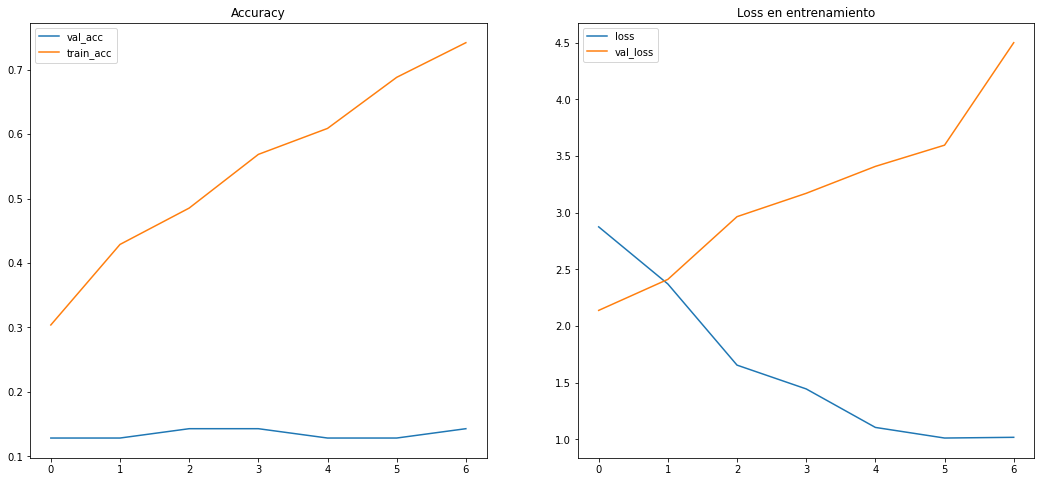

In [ ]:
graf_fit(hist_4_cero)

In [ ]:
model_cero_4.save('drive/MyDrive/natural_images/model_cero_4.h5')

In [ ]:
predictions_cero_1 = model_cero.predict(test_generator, verbose = 1)
enetB0_pred_classes_cero_1 = np.argmax(predictions_cero_1, axis=1)

44/44 [==============================] - 7s 123ms/step


In [ ]:
predictions_cero_2 = model_cero_2.predict(test_generator, verbose = 1)
enetB0_pred_classes_cero_2 = np.argmax(predictions_cero_2, axis=1)

44/44 [==============================] - 7s 118ms/step


In [ ]:
predictions_cero_3 = model_cero_3.predict(test_generator, verbose = 1)
enetB0_pred_classes_cero_3 = np.argmax(predictions_cero_3, axis=1)

44/44 [==============================] - 6s 119ms/step


In [ ]:
predictions_cero_4 = model_cero_4.predict(test_generator, verbose = 1)
enetB0_pred_classes_cero_4 = np.argmax(predictions_cero_4, axis=1)

44/44 [==============================] - 7s 120ms/step


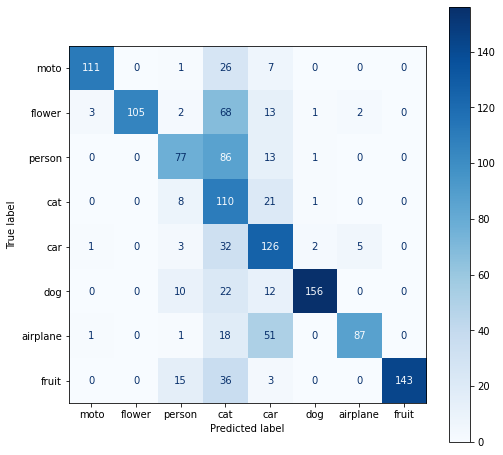

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_cero_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_cero_1, average='macro')

(0.7872586569519067, 0.6661975319407807, 0.6860993514209206, None)

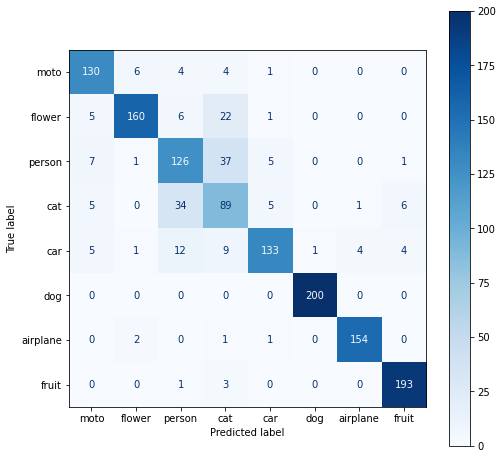

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_cero_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_cero_2, average='macro')

(0.8556217285330465, 0.8512792386212129, 0.8517876674742826, None)

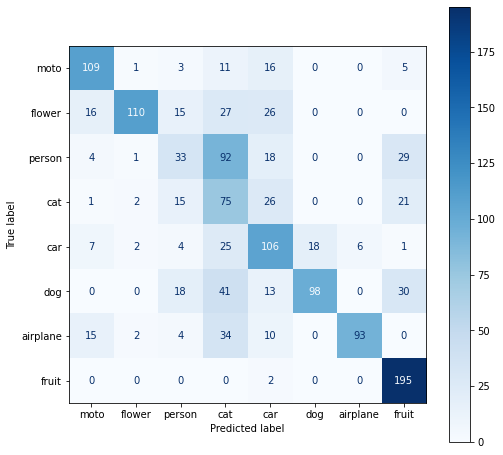

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_cero_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_cero_3, average='macro')

(0.6525696138395211, 0.5920704570592206, 0.5913347129132906, None)

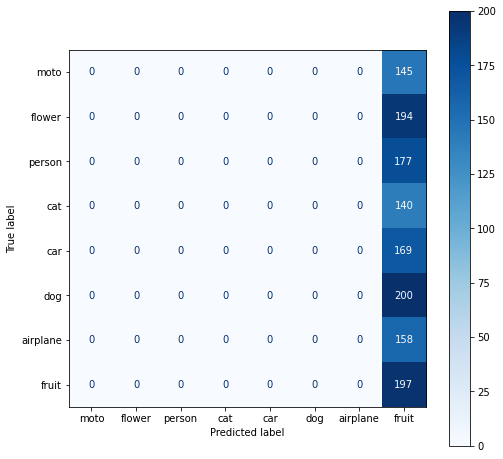

In [ ]:
cm = confusion_matrix(test_generator.labels, enetB0_pred_classes_cero_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["moto", "flower", "person", "cat", "car", "dog", "airplane", "fruit"])
plt.figure(figsize=(8, 8))
disp.plot(ax=plt.gca(),cmap=plt.cm.Blues)

plt.show()

In [ ]:
precision_recall_fscore_support(test_generator.labels, enetB0_pred_classes_cero_4, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.017844202898550723, 0.125, 0.031230183893468613, None)

## Dataset perritos

> Link carpeta con modelos e histogramas guardados [aquí](https://drive.google.com/drive/folders/1gl8g0EUHUjSq1fqVH9Ndg4KpwxPxMgnk?usp=sharing)



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

IMG_SIZE = 224
batch_size = 64

dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train", "test"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

In [ ]:
import matplotlib.pyplot as plt


def format_label(label):
    string_label = label_info.int2str(label)
    return string_label.split("-")[1]

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='stanford_dogs',
    version=0.2.0,
    description='The Stanford Dogs dataset contains images of 120 breeds of dogs from around
the world. This dataset has been built using images and annotation from
ImageNet for the task of fine-grained image categorization. There are
20,580 images, out of which 12,000 are used for training and 8580 for
testing. Class labels and bounding box annotations are provided
for all the 12,000 images.',
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
        }),
    }),
    total_num_examples=20580,
    splits={
        'test': 8580,
        'train': 12000,
    },
    supervised_keys=('image'

Text(0.5, 1.0, 'Usuarios de lenguajes de programación')

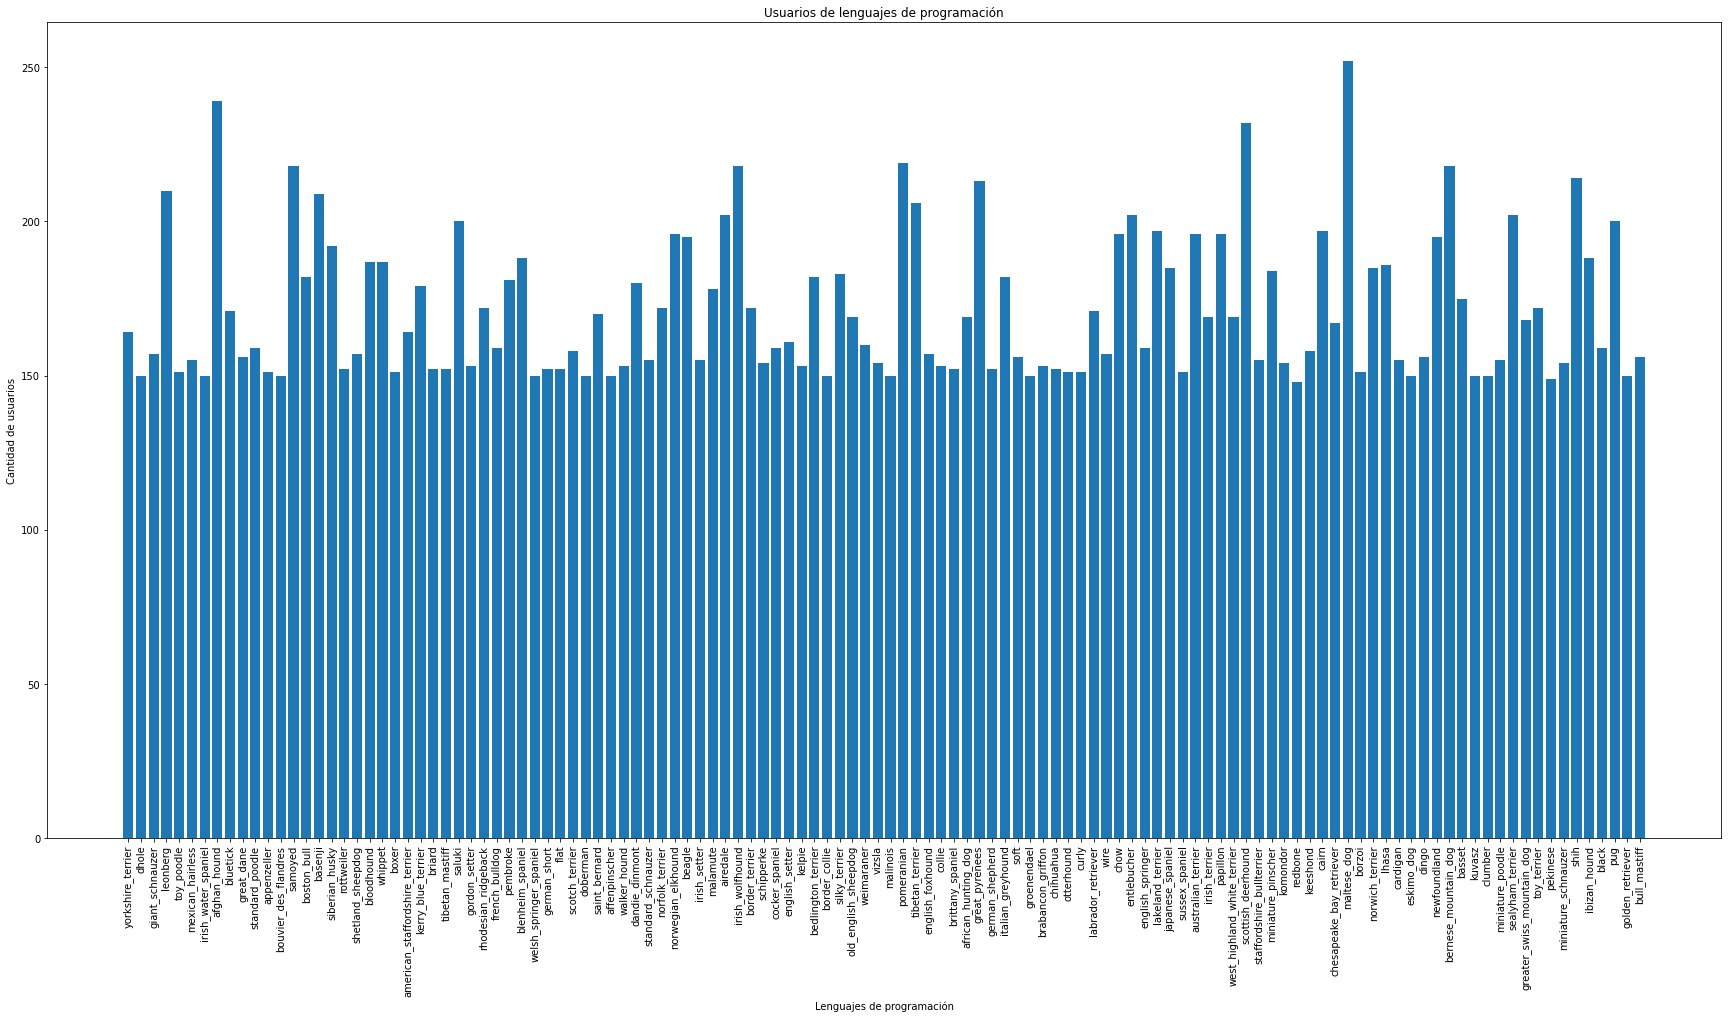

In [ ]:
dic={}
k=0
label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(len(ds_train))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
for i, (image, label) in enumerate(ds_test.take(len(ds_test))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1

X=list(dic.keys())
Y=list(dic.values())
plt.bar(X,Y)
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (30, 15)

## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Lenguajes de programación')
 
## Título de Gráfica
plt.title('Usuarios de lenguajes de programación')


### Primer experimento 75%

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

IMG_SIZE = 224
batch_size = 64

dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train[:75%]", "test[:75%]"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

In [ ]:
len(ds_train)

9000

Text(0.5, 1.0, 'Usuarios de lenguajes de programación')

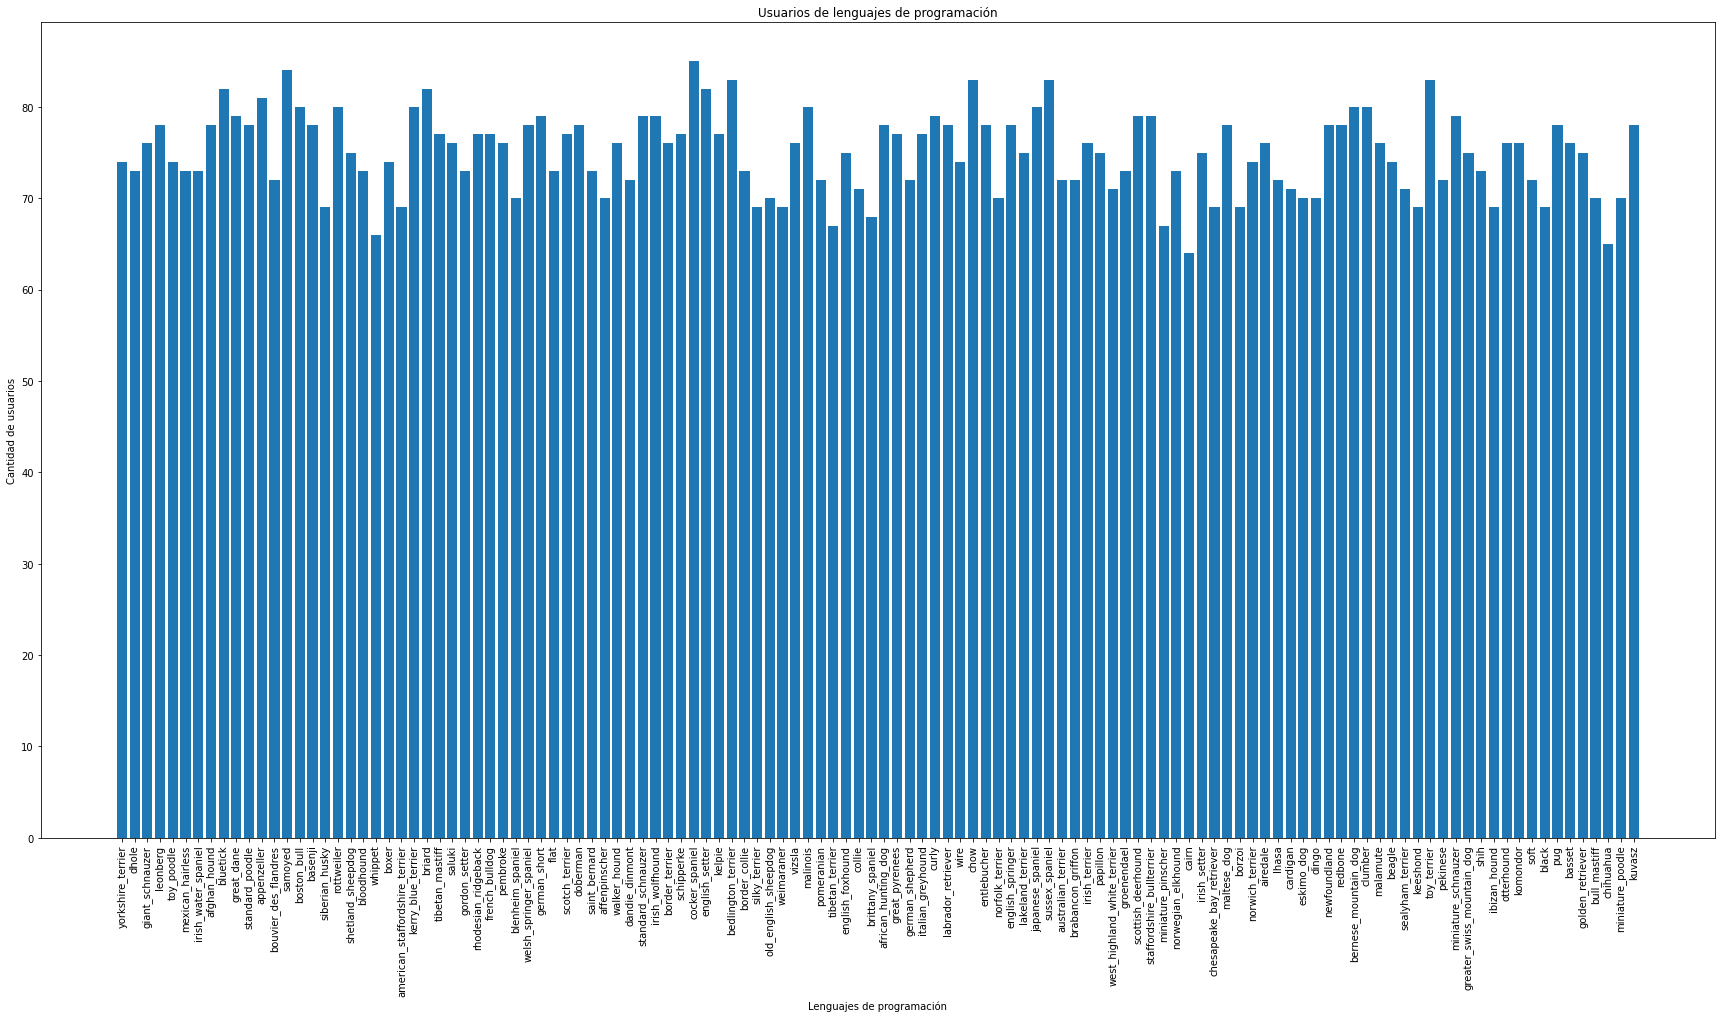

In [ ]:
dic={}
k=0
for i, (image, label) in enumerate(ds_train.take(len(ds_train))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
for i, (image, label) in enumerate(ds_test.take(len(ds_test))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
X=list(dic.keys())
Y=list(dic.values())
plt.bar(X,Y)
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (30, 15)

## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Lenguajes de programación')
 
## Título de Gráfica
plt.title('Usuarios de lenguajes de programación')

In [ ]:
print('#clases',len(X))

#clases 120


In [ ]:
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

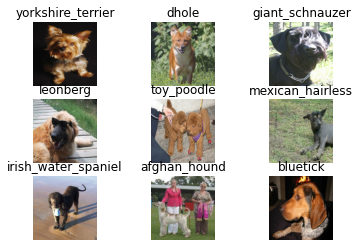

In [ ]:
import matplotlib.pyplot as plt


def format_label(label):
    string_label = label_info.int2str(label)
    return string_label.split("-")[1]


label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(
    input_preprocess, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

In [ ]:
def plot_hist(history):  
  fig, axis = plt.subplots(1, 2, figsize=(18,8))
  axis[0].plot(history.history['val_accuracy'], label='val_acc')
  axis[0].plot(history.history['accuracy'], label='train_acc')
  axis[0].set_title("Accuracy")
  axis[0].legend()
  axis[1].plot(history.history['val_loss'], label='val_loss')
  axis[1].plot(history.history['loss'], label='train_loss')
  axis[1].set_title("Loss en entrenamiento")
  axis[1].legend()
  plt.show()
def plot_hist2(history):  #Para histogramas cargados (.json)
  fig, axis = plt.subplots(1, 2, figsize=(18,8))
  axis[0].plot(history['val_accuracy'], label='val_acc')
  axis[0].plot(history['accuracy'], label='train_acc')
  axis[0].set_title("Accuracy")
  axis[0].legend()
  axis[1].plot(history['val_loss'], label='val_loss')
  axis[1].plot(history['loss'], label='train_loss')
  axis[1].set_title("Loss en entrenamiento")
  axis[1].legend()
  plt.show()

Modelo 75% entrenamiento de cero

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

epochs = 40 
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

In [ ]:
modelo75_zero = model
hist75_zero = hist

In [ ]:
plot_hist(hist75_zero)

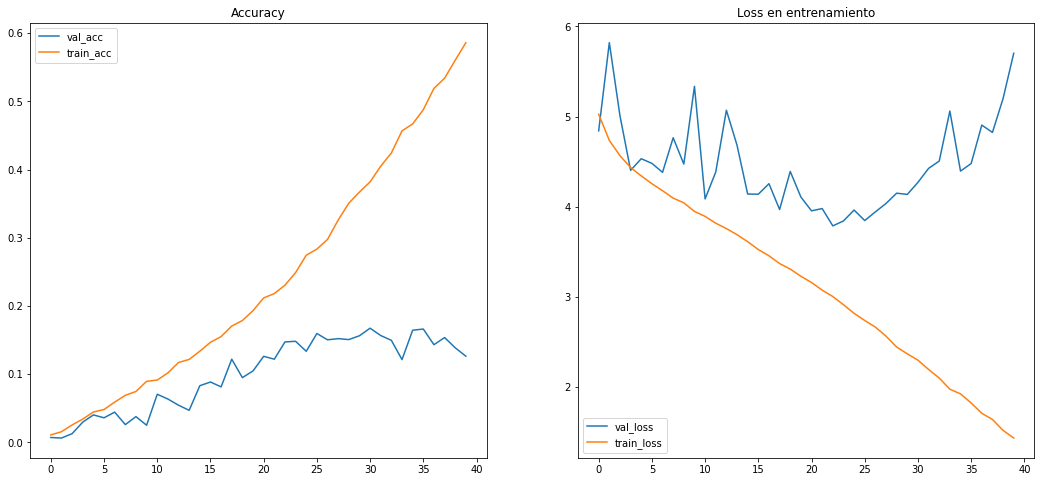

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/75history_from_scratch.json')
  
# returns JSON object as 
# a dictionary
data1_75 = json.load(f)
plot_hist2(data1_75)
"""

Modelo 75% entrenamiento pre-entrenado

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model2 = build_model(num_classes=NUM_CLASSES)

epochs = 25 
hist = model2.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

modelo75_pre = model
hist75_pre = hist
plot_hist(hist)

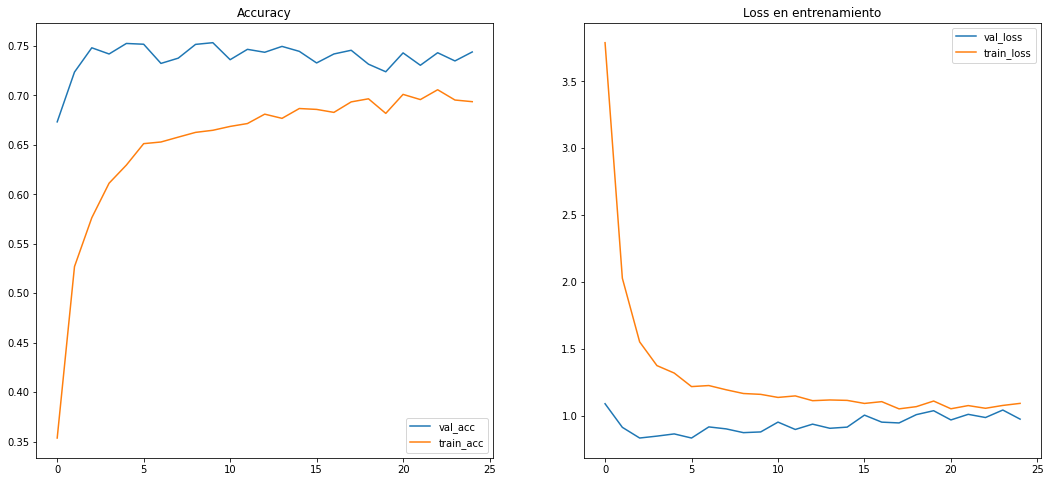

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/75historypretrainedmodelfreeze.json')
  
# returns JSON object as 
# a dictionary
data2_75 = json.load(f)
plot_hist2(data2_75)
"""

Modelo 75% entrenamiento descongelamiento

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

In [ ]:
unfreeze_model(model2)

epochs = 10  
hist = model2.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

modelo75_unfreeze = model
hist75_unfreeze = hist

plot_hist(hist75_unfreeze)

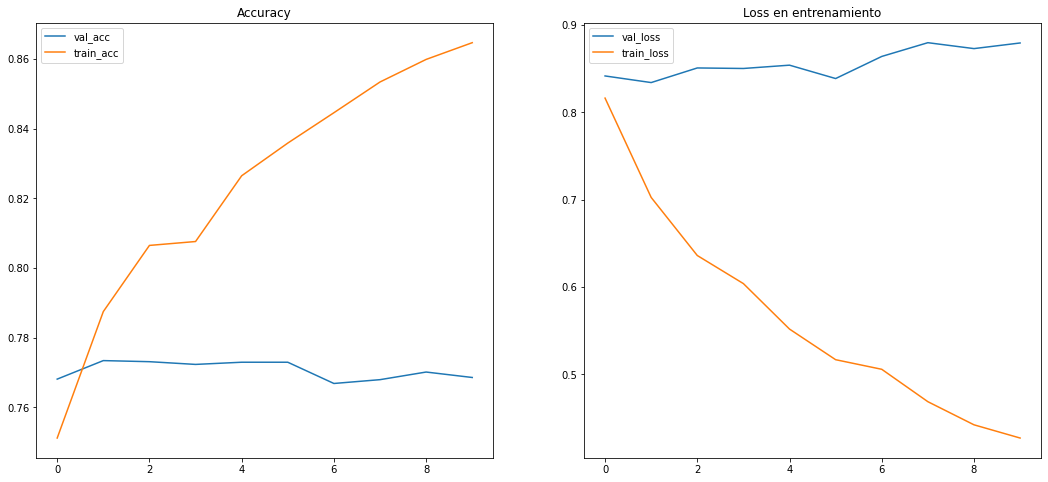

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/75historypretrainedmodelunfreeze.json')
  
# returns JSON object as 
# a dictionary
data3_75 = json.load(f)
plot_hist2(data3_75)
"""

### Segundo experimento - 50%

In [ ]:
dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train[:50%]", "test[:50%]"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [ ]:
len(ds_train)

6000

Text(0.5, 1.0, 'Usuarios de lenguajes de programación')

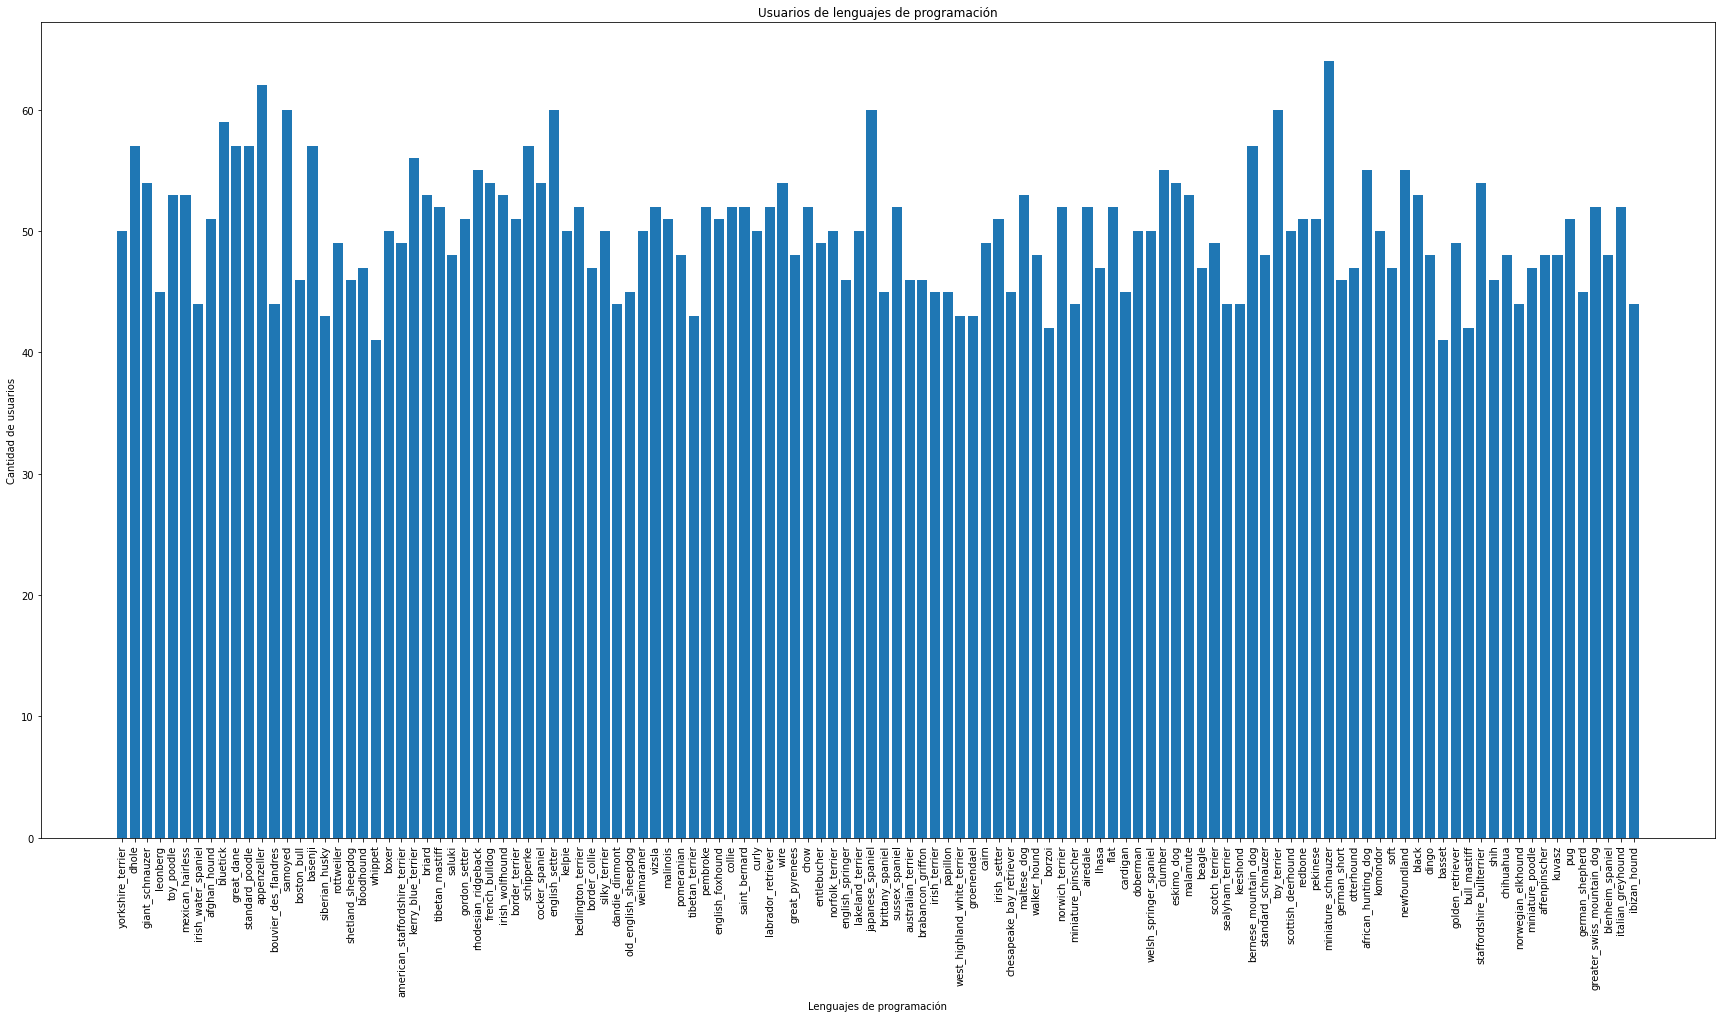

In [ ]:
dic={}
k=0
label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(len(ds_train))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
for i, (image, label) in enumerate(ds_test.take(len(ds_test))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
X=list(dic.keys())
Y=list(dic.values())
plt.bar(X,Y)
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (30, 15)

## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Lenguajes de programación')
 
## Título de Gráfica
plt.title('Usuarios de lenguajes de programación')


In [ ]:
print('#clases',len(X))

#clases 120


In [ ]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(
    input_preprocess, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

Modelo 50% entrenamiento de cero

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

epochs = 40 
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

In [ ]:
modelo50_zero = model
hist50_zero = hist
plot_hist(hist50_zero)

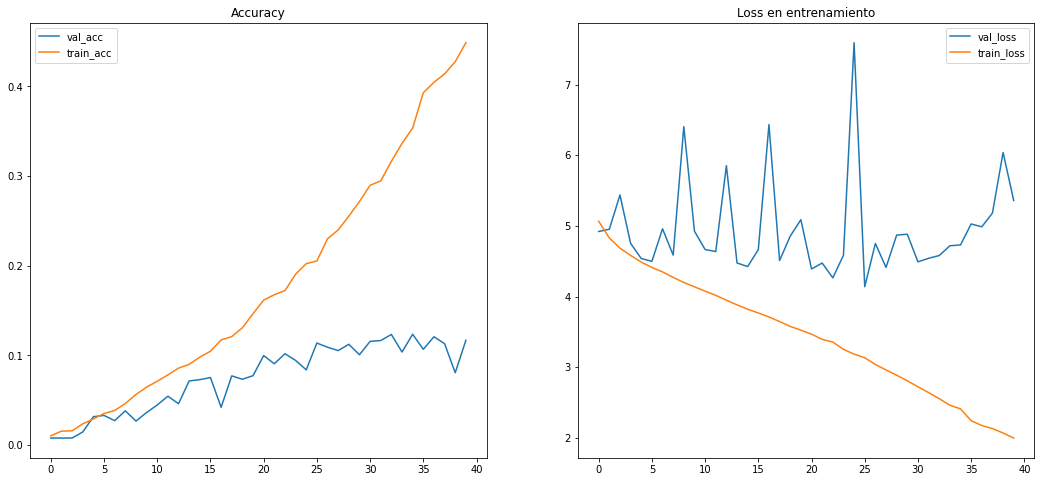

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/50history_from_scratch.json')
  
# returns JSON object as 
# a dictionary
data1_50 = json.load(f)
plot_hist2(data1_50)
"""

Modelo 50% entrenamiento pre-entrenamiento

In [ ]:
modelo50_pre = build_model(num_classes=NUM_CLASSES)

epochs = 25 
hist50_pre = modelo50_pre.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)
plot_hist(hist50_pre)

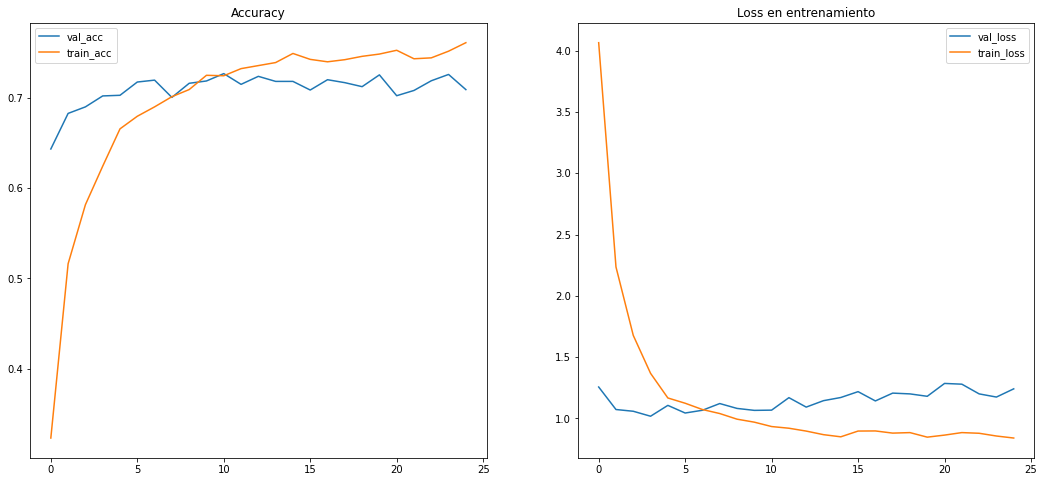

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/50historypretrainedmodelfreeze.json')
  
# returns JSON object as 
# a dictionary
data2_50 = json.load(f)
plot_hist2(data2_50)
"""

Modelo 50% entrenamiento descongelamiento

In [ ]:
unfreeze_model(modelo50_pre)

epochs = 10  
hist = modelo50_pre.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

modelo50_unfreeze = modelo50_pre
hist50_unfreeze = hist

plot_hist(hist50_unfreeze)

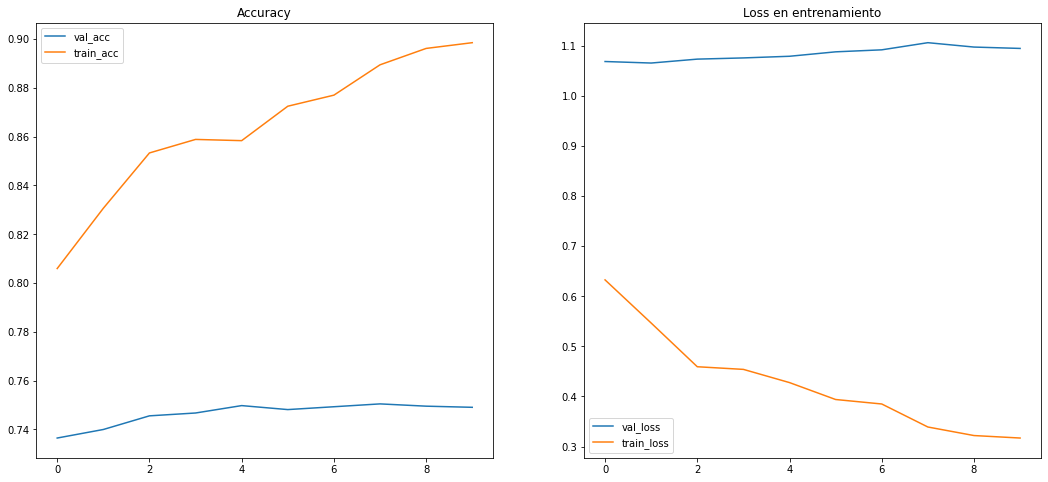

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/50historypretrainedmodelunfreeze.json')
  
# returns JSON object as 
# a dictionary
data3_50 = json.load(f)
plot_hist2(data3_50)
"""

### Tercer experimento 25%

In [ ]:
dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train[:25%]", "test[:25%]"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [ ]:
len(ds_train)

3000

Text(0.5, 1.0, 'Usuarios de lenguajes de programación')

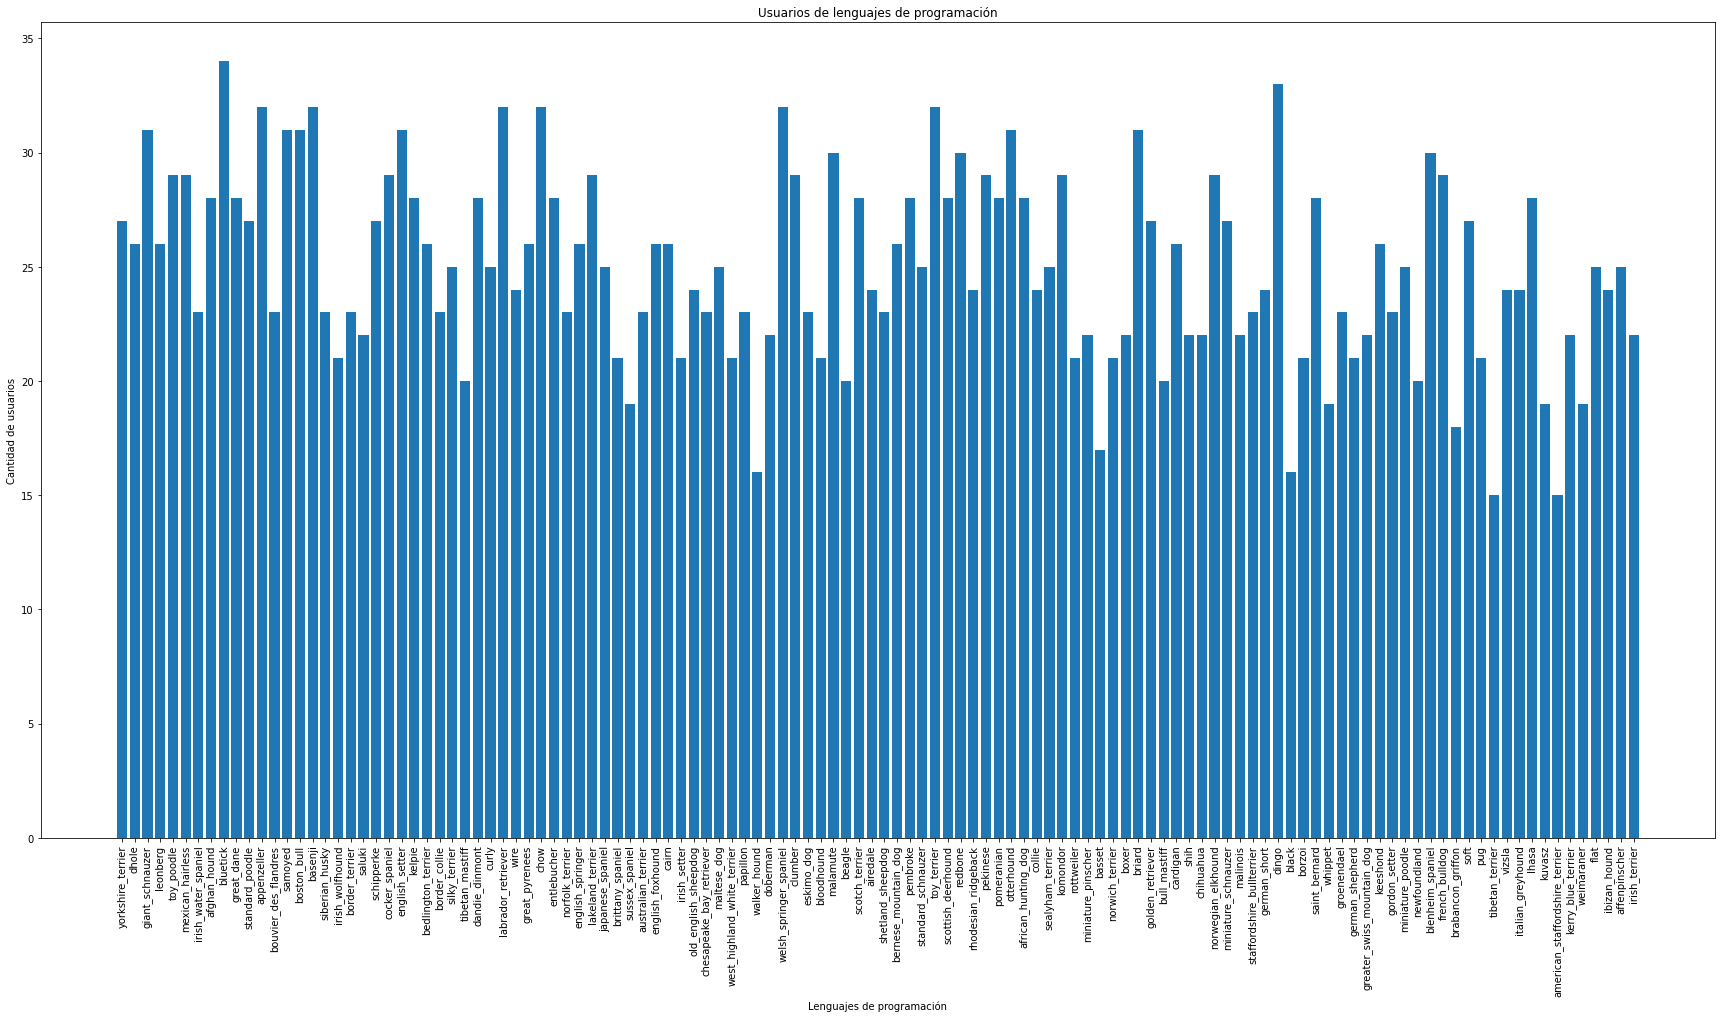

In [ ]:
dic={}
k=0
label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(len(ds_train))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
for i, (image, label) in enumerate(ds_test.take(len(ds_test))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
X=list(dic.keys())
Y=list(dic.values())
plt.bar(X,Y)
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (30, 15)

## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Lenguajes de programación')
 
## Título de Gráfica
plt.title('Usuarios de lenguajes de programación')


In [ ]:
print('#clases',len(X))

#clases 120


In [ ]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(
    input_preprocess, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

Modelo 25% entrenamiento de cero

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

epochs = 40 
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

In [ ]:
modelo25_zero = model
hist25_zero = hist
plot_hist(hist25_zero)

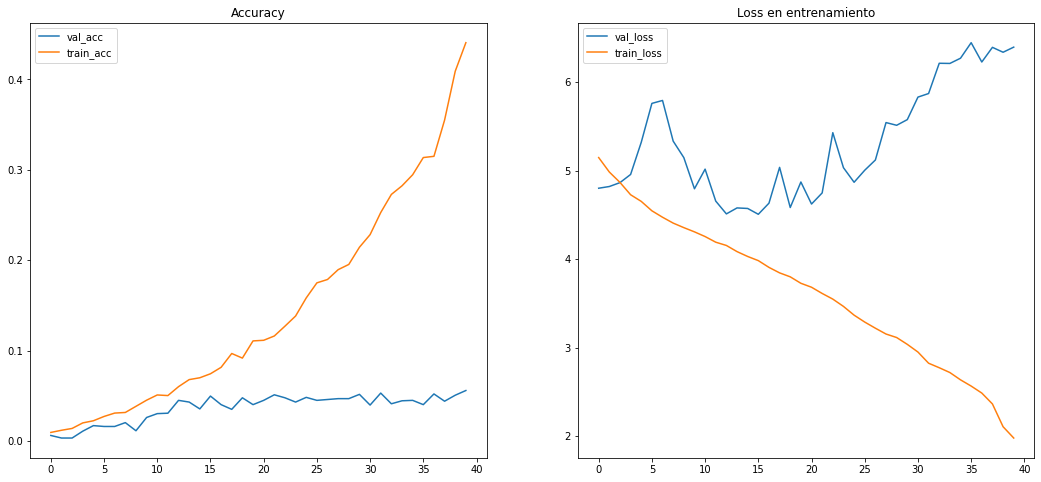

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/25history_from_scratch.json')
  
# returns JSON object as 
# a dictionary
data1_25 = json.load(f)
plot_hist2(data1_25)
"""

Modelo 25% entrenamiento pre-entrenamiento

In [ ]:
modelo25_pre = build_model(num_classes=NUM_CLASSES)

epochs = 25 
hist25_pre = modelo25_pre.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)
plot_hist(hist25_pre)

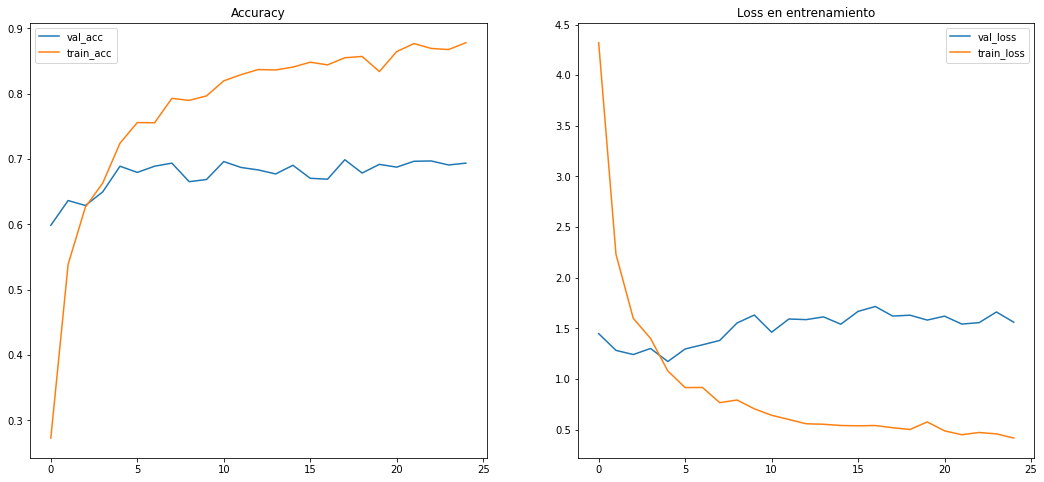

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/25historypretrainedmodelfreeze.json')
  
# returns JSON object as 
# a dictionary
data2_25 = json.load(f)
plot_hist2(data2_25)
"""

Modelo 25% entrenamiento descongelamiento

In [ ]:
unfreeze_model(modelo25_pre)

epochs = 10  
hist25_unfreeze = modelo25_pre.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

modelo25_unfreeze = modelo25_pre

plot_hist(hist25_unfreeze)

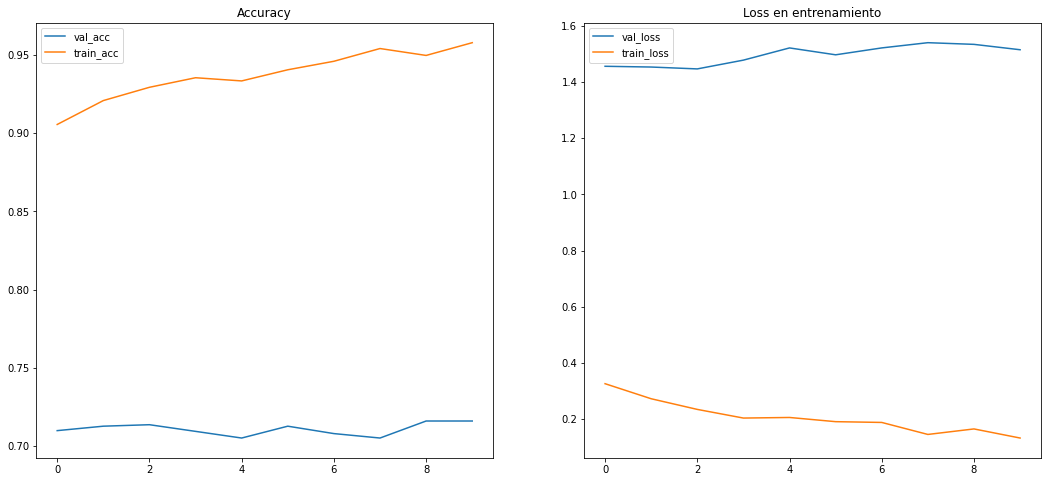

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/25historypretrainedmodelunfreeze.json')
  
# returns JSON object as 
# a dictionary
data3_25 = json.load(f)
plot_hist2(data3_25)
"""

### Cuarto experimento 12%

In [ ]:
dataset_name = "stanford_dogs"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train[:12%]", "test[:12%]"], with_info=True, as_supervised=True
)
NUM_CLASSES = ds_info.features["label"].num_classes

size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [ ]:
len(ds_train)

1440

Text(0.5, 1.0, 'Usuarios de lenguajes de programación')

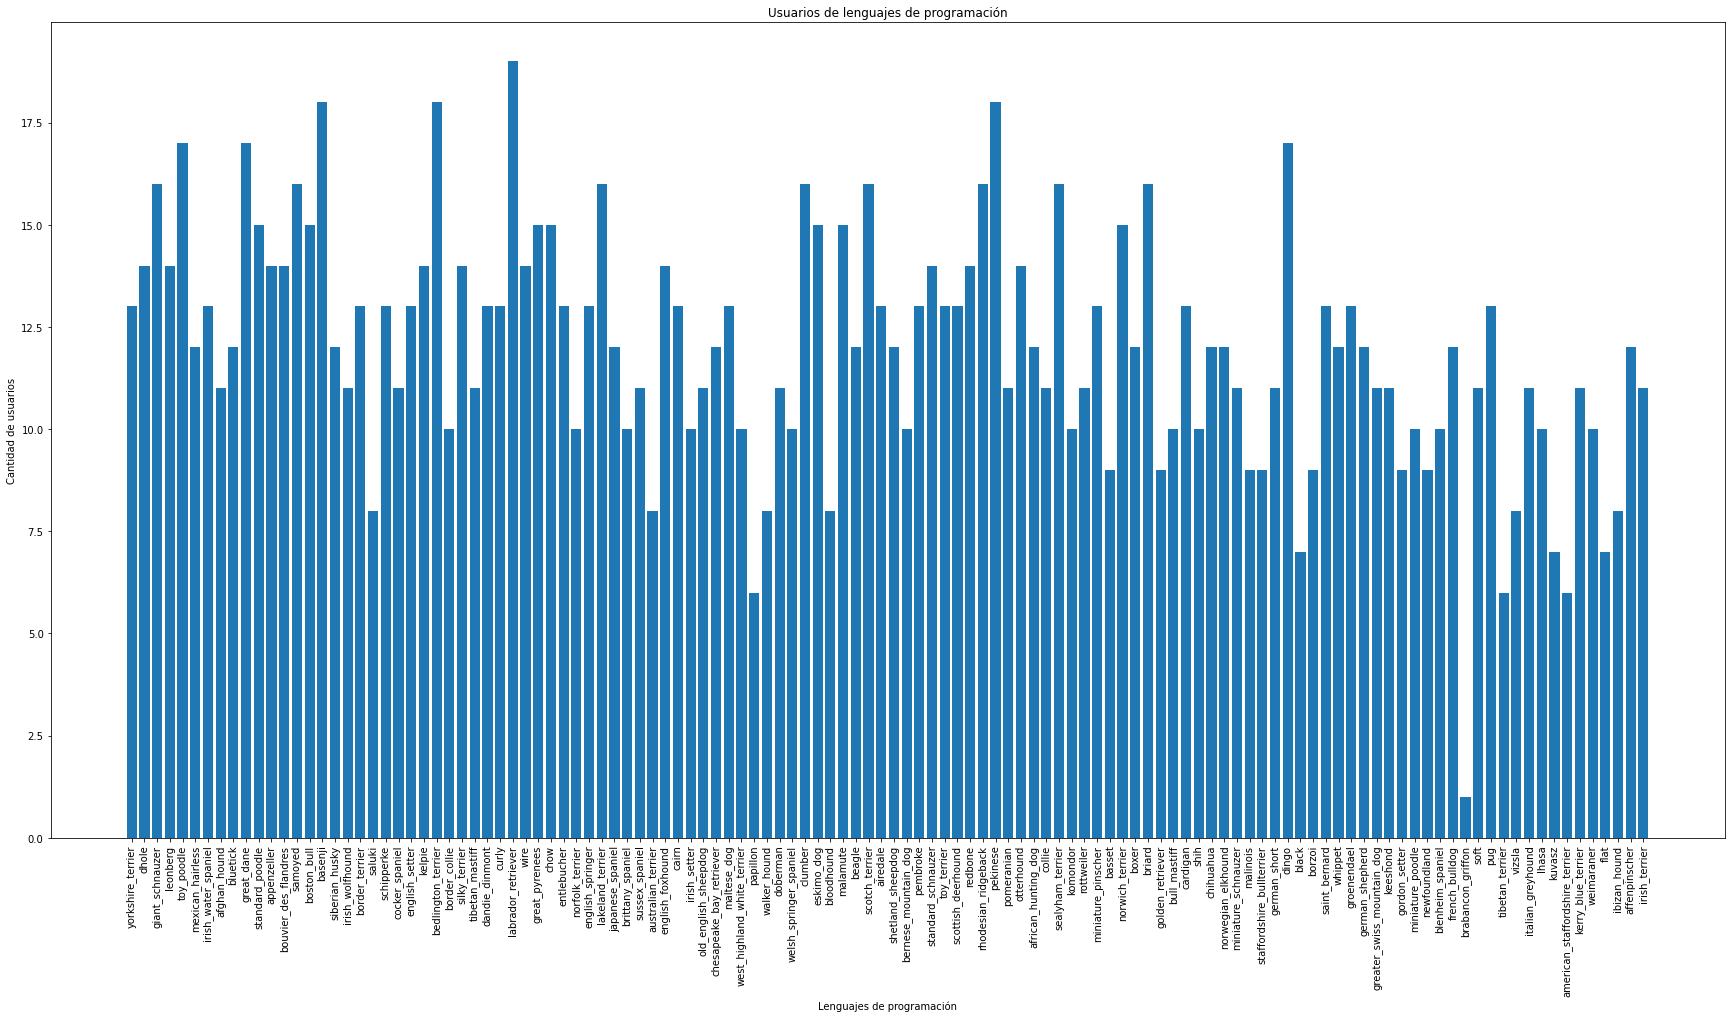

In [ ]:
dic={}
k=0
label_info = ds_info.features["label"]
for i, (image, label) in enumerate(ds_train.take(len(ds_train))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
for i, (image, label) in enumerate(ds_test.take(len(ds_test))):
    if format_label(label) not in dic:
      dic[format_label(label)]=0
    dic[format_label(label)]+=1
    k+=1
"""
X=list(dic.keys())
Y=list(dic.values())
plt.bar(X,Y)
plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (30, 15)

## Legenda en el eje y
plt.ylabel('Cantidad de usuarios')
 
## Legenda en el eje x
plt.xlabel('Lenguajes de programación')
 
## Título de Gráfica
plt.title('Usuarios de lenguajes de programación')


In [ ]:
print('#clases',len(X))

#clases 120


In [ ]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(
    input_preprocess, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

Modelo 12% entrenamiento de cero

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = img_augmentation(inputs)
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

epochs = 40 
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 224, 224, 3)      0         
 l)                                                              
                                                                 
 efficientnetb0 (Functional)  (None, 120)              4203291   
                                                                 
Total params: 4,203,291
Trainable params: 4,161,268
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/40
22/22 - 38s - loss: 5.1671 - accuracy: 0.0057 - val_loss: 4.7970 - val_accuracy: 0.0088 - 38s/epoch - 2s/step
Epoch 2/40
22/22 - 14s - loss: 5.0705 - accuracy: 0.0107 - val_loss: 4.8178 - val_accuracy: 0.0088 - 14s/epoch - 659ms/step

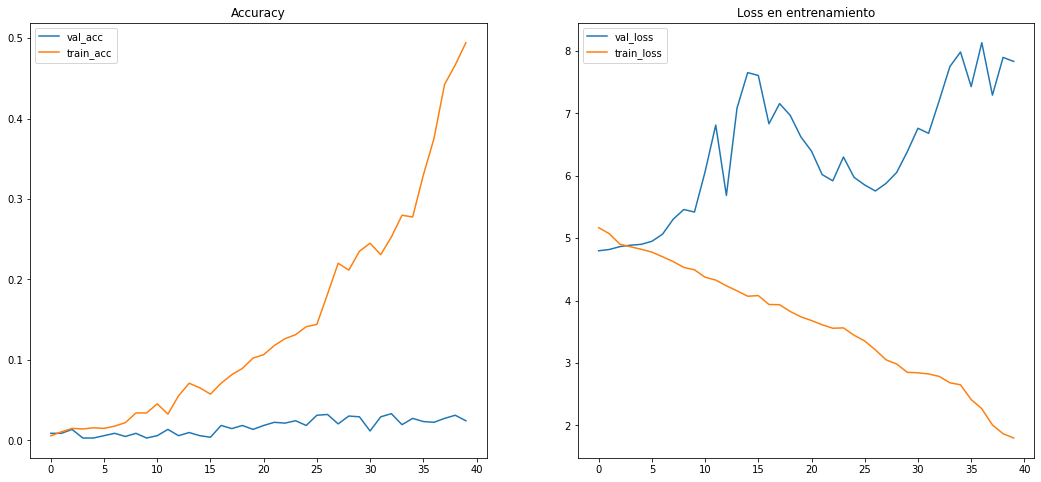

In [ ]:
modelo12_zero = model
hist12_zero = hist
plot_hist(hist12_zero)

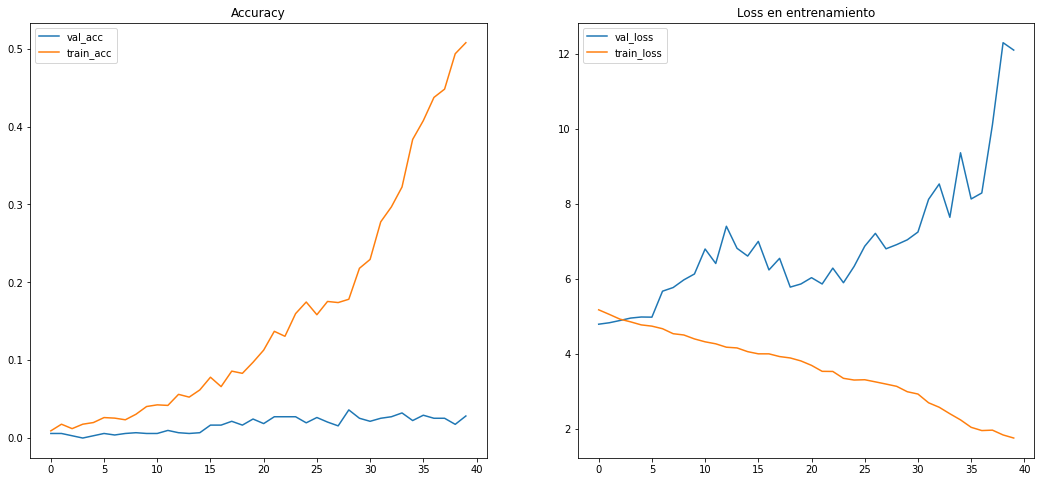

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/12history_from_scratch.json')
  
# returns JSON object as a dictionary
data1_12 = json.load(f)
plot_hist2(data1_12)
"""

Modelo 12% entrenamiento pre-entrenamiento

In [ ]:
modelo12_pre = build_model(num_classes=NUM_CLASSES)

epochs = 25 
hist12_pre = modelo12_pre.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)
plot_hist(hist12_pre)

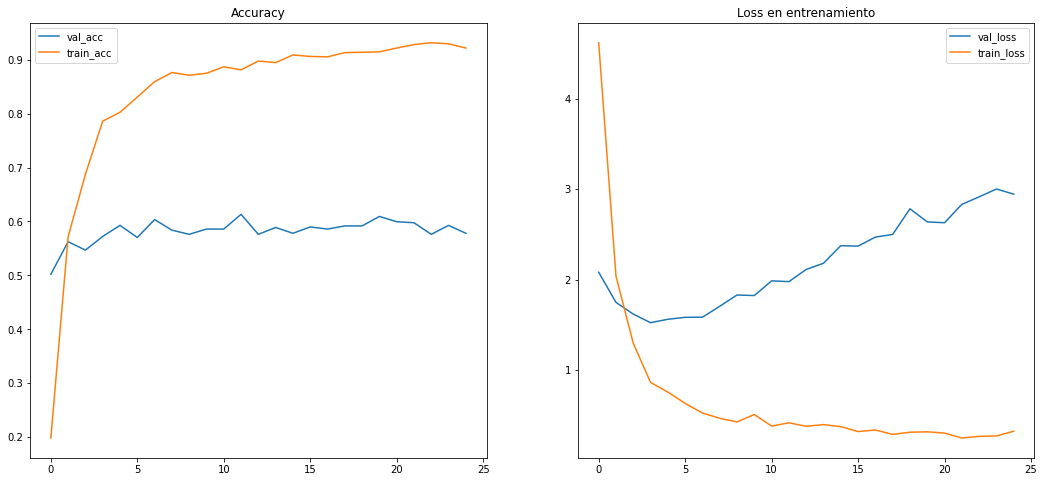

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/12historypretrainedmodelfreeze.json')
  
# returns JSON object as 
# a dictionary
data2_12 = json.load(f)
plot_hist2(data2_12)
"""

Modelo 12% entrenamiento descongelamiento

In [ ]:
unfreeze_model(modelo12_pre)

epochs = 10  
hist12_unfreeze = modelo12_pre.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)

modelo12_unfreeze = modelo12_pre

plot_hist(hist12_unfreeze)

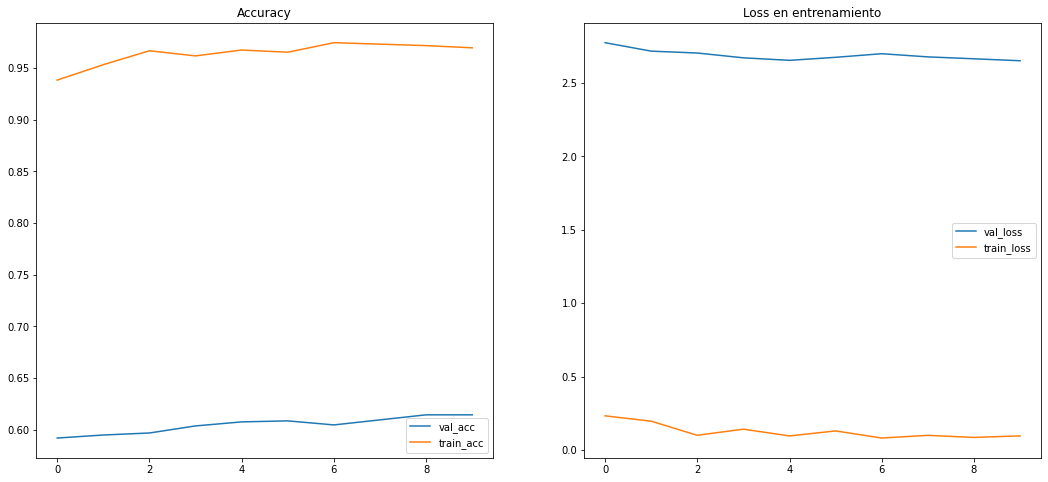

In [ ]:
"""
import json
  
# Opening JSON file
f = open('/content/12historypretrainedmodelunfreeze.json')
  
# returns JSON object as 
# a dictionary
data3_12 = json.load(f)
plot_hist2(data3_12)
"""

# Parte II - Desafío Kaggle




<table align='left'>
<tr>
<td><img src='https://www.ciperchile.cl/wp-content/uploads/AC-e1574445462203.jpg' width='800'/> </td>
</tr>
</table>


Poder aprender a reconocer audio ha permitido grandes avances en diversas disciplinas. En esta competencia se solicita clasificar extractos de audio de duración variable entre 167 hablantes relacionados con la convención constituyente.

Más detalles en: https://www.kaggle.com/competitions/clasificacion-de-hablantes


## Conectar con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import logging, copy
import os
import IPython
from pydub import AudioSegment
import matplotlib.pyplot as plt
import operator
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [ ]:
train_dir = "/content/drive/MyDrive/Data_taller_2/data/train/"
test_dir = "/content/drive/MyDrive/Data_taller_2/data/test/"
train_directory_list = os.listdir(train_dir)
test_directory_list = os.listdir(test_dir)

## Funciones de regalo

In [ ]:
DEFAULT_RNG = np.random.default_rng()
logger = logging.getLogger(__name__)

def wav_a_mel_spectrogram(wav,sampling_rate=16000,mel_window_length=25,mel_window_step=10,mel_n_channels = 40):
    #recibe un wav y retorna el espectrograma
    frames = librosa.feature.melspectrogram(
        y=wav,
        sr=sampling_rate,
        n_fft=int(sampling_rate * mel_window_length / 1000),
        hop_length=int(sampling_rate * mel_window_step / 1000),
        n_mels=mel_n_channels
    )
    return frames.astype(np.float32).T

def embed_utterance(
    wav: np.ndarray
):
    #retorna el espectrograma
    mel = wav_a_mel_spectrogram(wav)
    return mel


class Audio(object): #clase audio, tiene algunos metodos utiles
    def __init__(self, data=None, sampleRate=None):
        self.data = data
        self.sampleRate = sampleRate
        if (data is not None) and (sampleRate is not None):
            self.duration = len(self.data) / self.sampleRate
        else:
            self.duration = None
        self._metadata = {}


    def read(self, datafile, sampleRate=16000): #lee audio
        self.data, self.sampleRate = librosa.load(
            path=datafile, sr=sampleRate, res_type="kaiser_fast"
        )
        self.data = np.nan_to_num(self.data)
        self.duration = len(self.data) / self.sampleRate
        self._metadata["datafile"] = datafile
        return self

    def clip(self, start, end): #extrae ventana del audio entre start y end segundos
        startIdx = int(start * self.sampleRate)
        endIdx = int(end * self.sampleRate)
        resAudio = Audio(self.data[startIdx:endIdx], self.sampleRate)
        resAudio._metadata = copy.deepcopy(self._metadata)
        if "history" in resAudio._metadata.keys():
            resAudio._metadata["history"].append(
                {"action": "clip", "values": [start, end]}
            )
        else:
            resAudio._metadata["history"] = [{"action": "clip", "values": [start, end]}]
        return resAudio

    def addNoise(self, stdFactor): # pueden agregar ruido
        if stdFactor == 0:
            return copy.deepcopy(self)
        stdAudio = np.std(self.data)
        stdNoise = stdFactor * stdAudio
        noiseData = np.random.randn(len(self.data)) * stdNoise
        resAudio = Audio(np.nan_to_num(self.data + noiseData), self.sampleRate)
        resAudio._metadata = copy.deepcopy(self._metadata)
        if "history" in resAudio._metadata.keys():
            resAudio._metadata["history"].append(
                {"action": "addNoise", "value": stdFactor}
            )
        else:
            resAudio._metadata["history"] = [{"action": "addNoise", "value": stdFactor}]
        return resAudio

## Remover silencio

In [ ]:
def quitar_silencio(path,interlocutor,wav,train):
  audio, sr = librosa.load(path)
  clips = librosa.effects.split(audio, top_db=20)
  wav_data = []
  for c in clips:
    data = audio[c[0]: c[1]]
    wav_data.extend(data)
  if(train):
    path_salida = 'data/train/' + interlocutor + '/' + wav
  else:
    path_salida = 'data/test/' + wav
  sf.write(path_salida, wav_data, sr)

In [ ]:
interlocutores = []
os.mkdir('data')

os.mkdir('data/train')
for interlocutor in train_directory_list:
  os.mkdir('data/train/' + interlocutor)
  interlocutores.append(interlocutor)
  path = train_dir + interlocutor
  path_directory_list = os.listdir(path)
  for wav in path_directory_list:
    path_wav = path + '/' + wav
    quitar_silencio(path_wav,interlocutor,wav,1)

In [ ]:
os.mkdir('data/test')
for wav in test_directory_list:
  path_wav = test_dir + '/' + wav
  quitar_silencio(path_wav,'',wav,0)

In [ ]:
!zip -r /content/test.zip /content/data/test

## Análiisis de Datos

In [ ]:
new_train_dir = '/content/drive/MyDrive/Data_taller_2/data_solo_sin_silencio/train/content/data/train'
new_test_dir = '/content/drive/MyDrive/Data_taller_2/data_solo_sin_silencio/test/content/data/test'
train_directory_list = os.listdir(new_train_dir)
test_directory_list = os.listdir(new_test_dir)

In [ ]:
new_new_train_dir = '/content/drive/MyDrive/Data_taller_2/data_sin_silencio/train/content/data/train'
new_new_test_dir = '/content/drive/MyDrive/Data_taller_2/data_sin_silencio/test/content/data/test'
new_train_directory_list = os.listdir(new_train_dir)
new_test_directory_list = os.listdir(new_test_dir)

In [ ]:
interlocutores = []
for interlocutor in train_directory_list:
  interlocutores.append(interlocutor)

In [ ]:
tiempo_por_interlocutor = []
for interlocutor in interlocutores:
  path = new_train_dir + '/' + interlocutor
  #path = train_dir + interlocutor
  path_directory_list = os.listdir(path)
  tiempo = 0
  for wav in path_directory_list:
    path_wav = path + '/' + wav
    sound = AudioSegment.from_file(path_wav)
    sound.duration_seconds == (len(sound) / 1000.0)
    tiempo += sound.duration_seconds
  tiempo_por_interlocutor.append(tiempo)

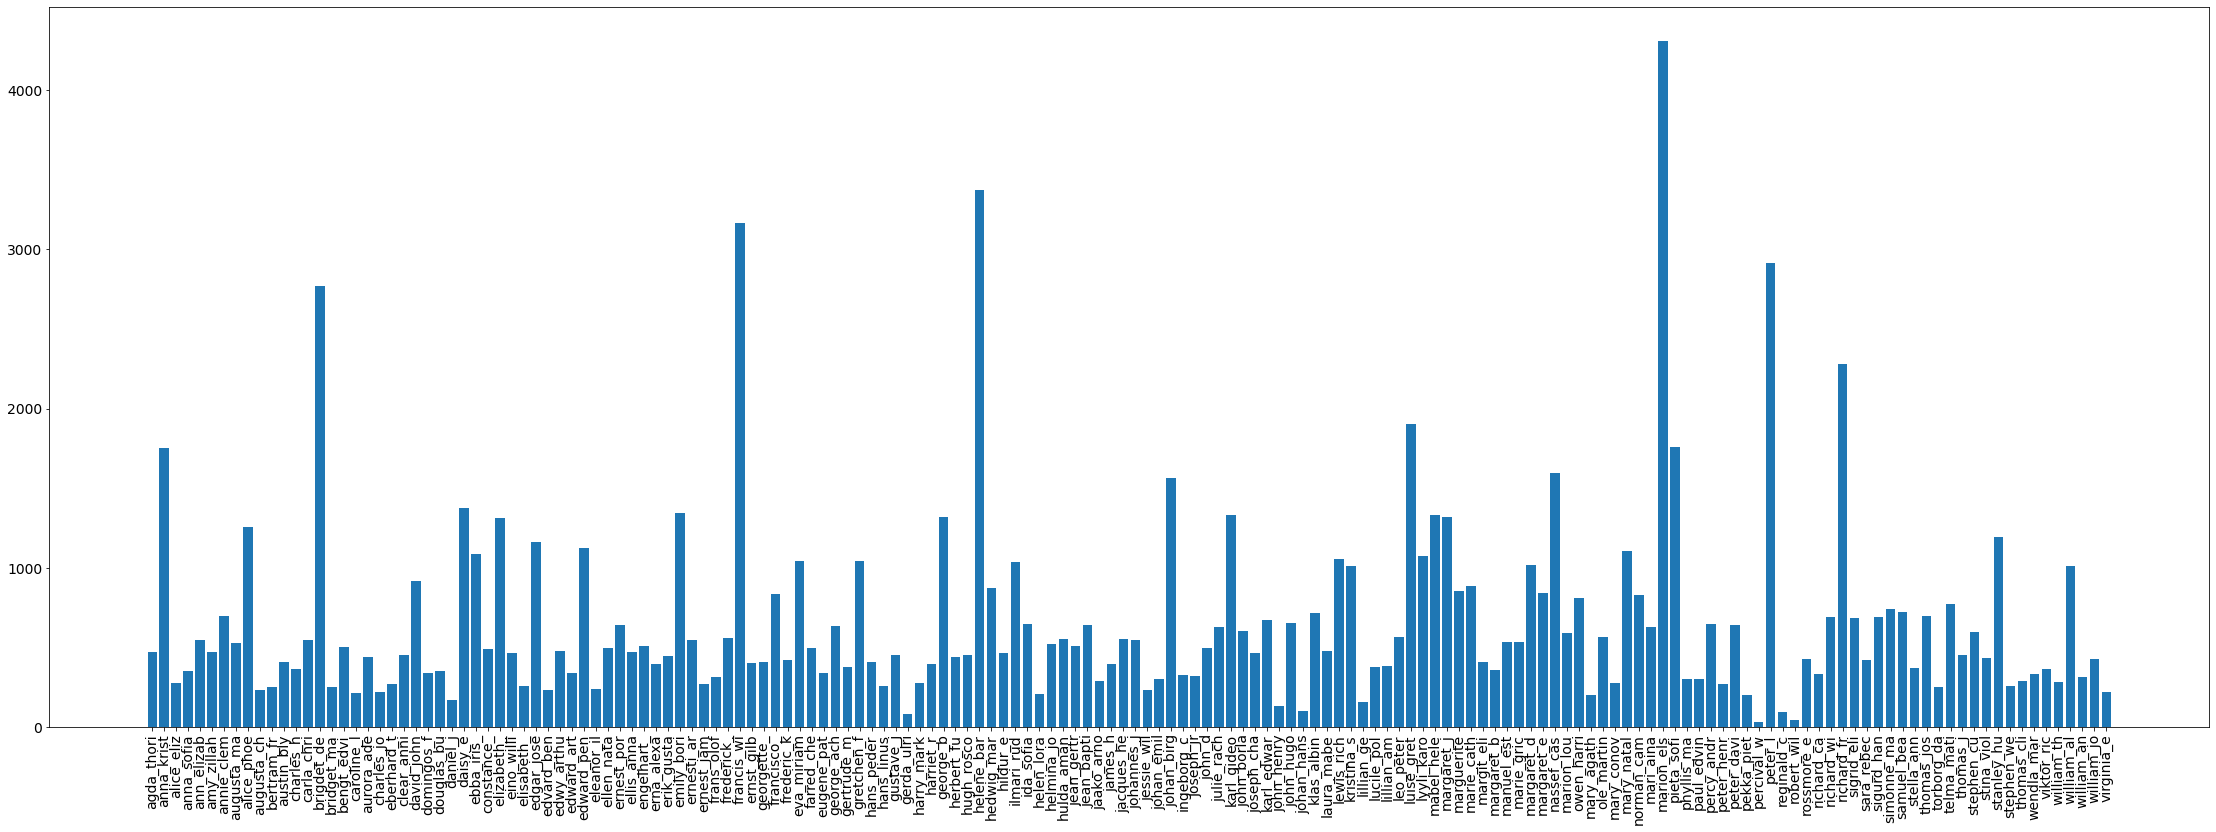

In [ ]:
x_axes = []
for inter in interlocutores:
  x_axes.append(inter[0:10])
fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.bar(x_axes,tiempo_por_interlocutor)
plt.show()

In [ ]:
dic = {}
i = 0
for i in range(len(interlocutores)):
  dic[interlocutores[i]] = tiempo_por_interlocutor[i]
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
dic = {}
for diccionario in sorted_dic:
  dic[diccionario[0]] = diccionario[1]

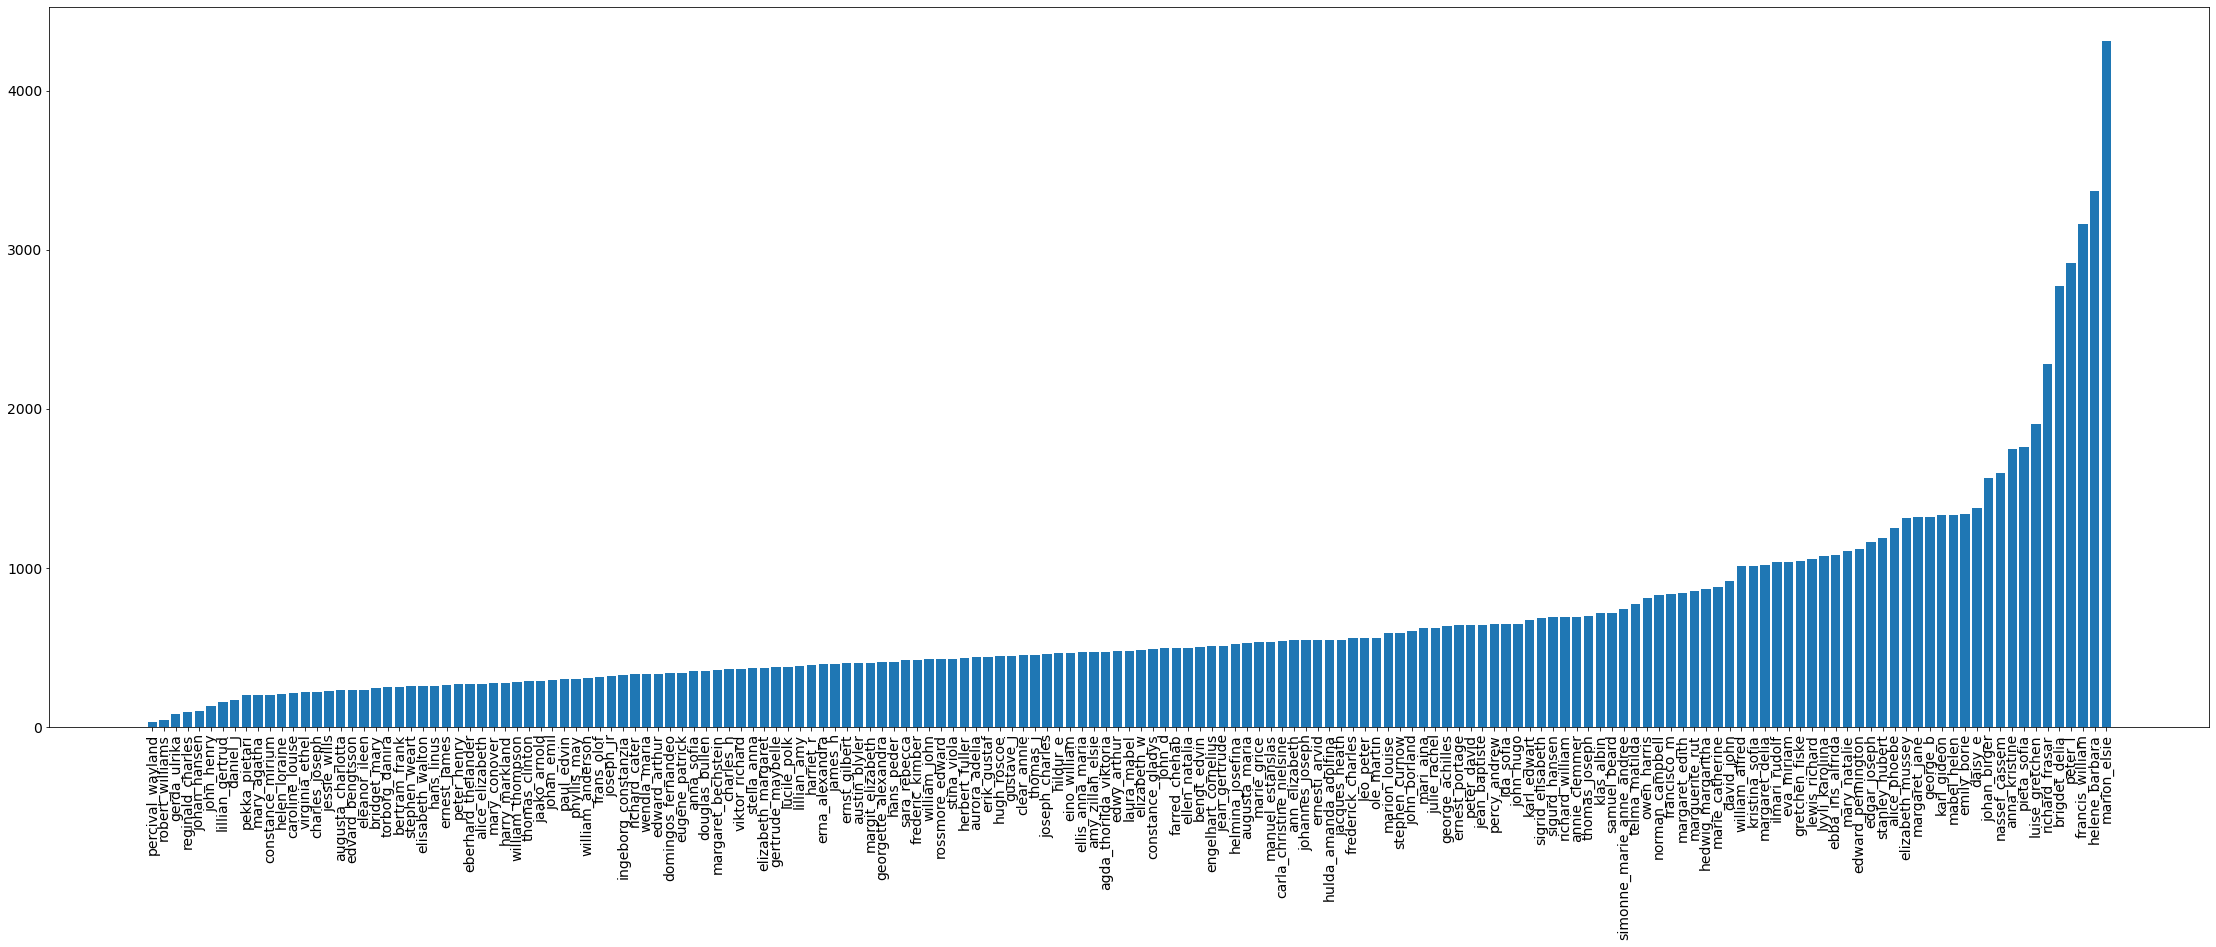

In [ ]:
fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.bar(dic.keys(),dic.values())
plt.show()

## Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    #0.8 = 1.25 la cantidad
    #0.5 = 2 la cantidad
    return librosa.effects.time_stretch(data, rate) #disminuye velocidad

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor) #modifica el tono

In [ ]:
#valor del audio con más seg
sorted_dic[-1]

('marion_elsie', 4308.5433106575965)

In [ ]:
max = 4308.5433106575965
for interlocutor,seg in sorted_dic:
  path = new_train_dir + '/' + interlocutor
  path_directory_list = os.listdir(path)
  tiempo = seg
  for wav in path_directory_list:
    path_wav = path + '/' + wav
    sound = AudioSegment.from_file(path_wav)
    sound.duration_seconds == (len(sound) / 1000.0)
    audio, sr = librosa.load(path_wav)
    if(tiempo+sound.duration_seconds < max):
      path_salida = path + '/noise_' + wav
      data_noise = noise(audio)
      sf.write(path_salida, data_noise, sr)
      tiempo += sound.duration_seconds
    if(tiempo+(sound.duration_seconds*1.25) < max):
      path_salida = path + '/stretch08_' + wav
      data_stretch08 = stretch(audio, rate=0.8)
      sf.write(path_salida, data_stretch08, sr)
      tiempo += (sound.duration_seconds*1.25)
    if(tiempo+(sound.duration_seconds*2) < max):
      path_salida = path + '/stretch05_' + wav
      data_stretch05 = stretch(audio, rate=0.5)
      sf.write(path_salida, data_stretch05, sr)
      tiempo += (sound.duration_seconds*2)
    if(tiempo+sound.duration_seconds < max):
      path_salida = path + '/pitch05_' + wav
      data_pitch05 = pitch(audio,sr,pitch_factor=0.5)
      sf.write(path_salida, data_pitch05, sr)
      tiempo += sound.duration_seconds
    if(tiempo+sound.duration_seconds < max):
      path_salida = path + '/pitch1_' + wav
      data_pitch1 = pitch(audio,sr,pitch_factor=1)
      sf.write(path_salida, data_pitch1, sr)
      tiempo += sound.duration_seconds
  dic[interlocutor] = tiempo

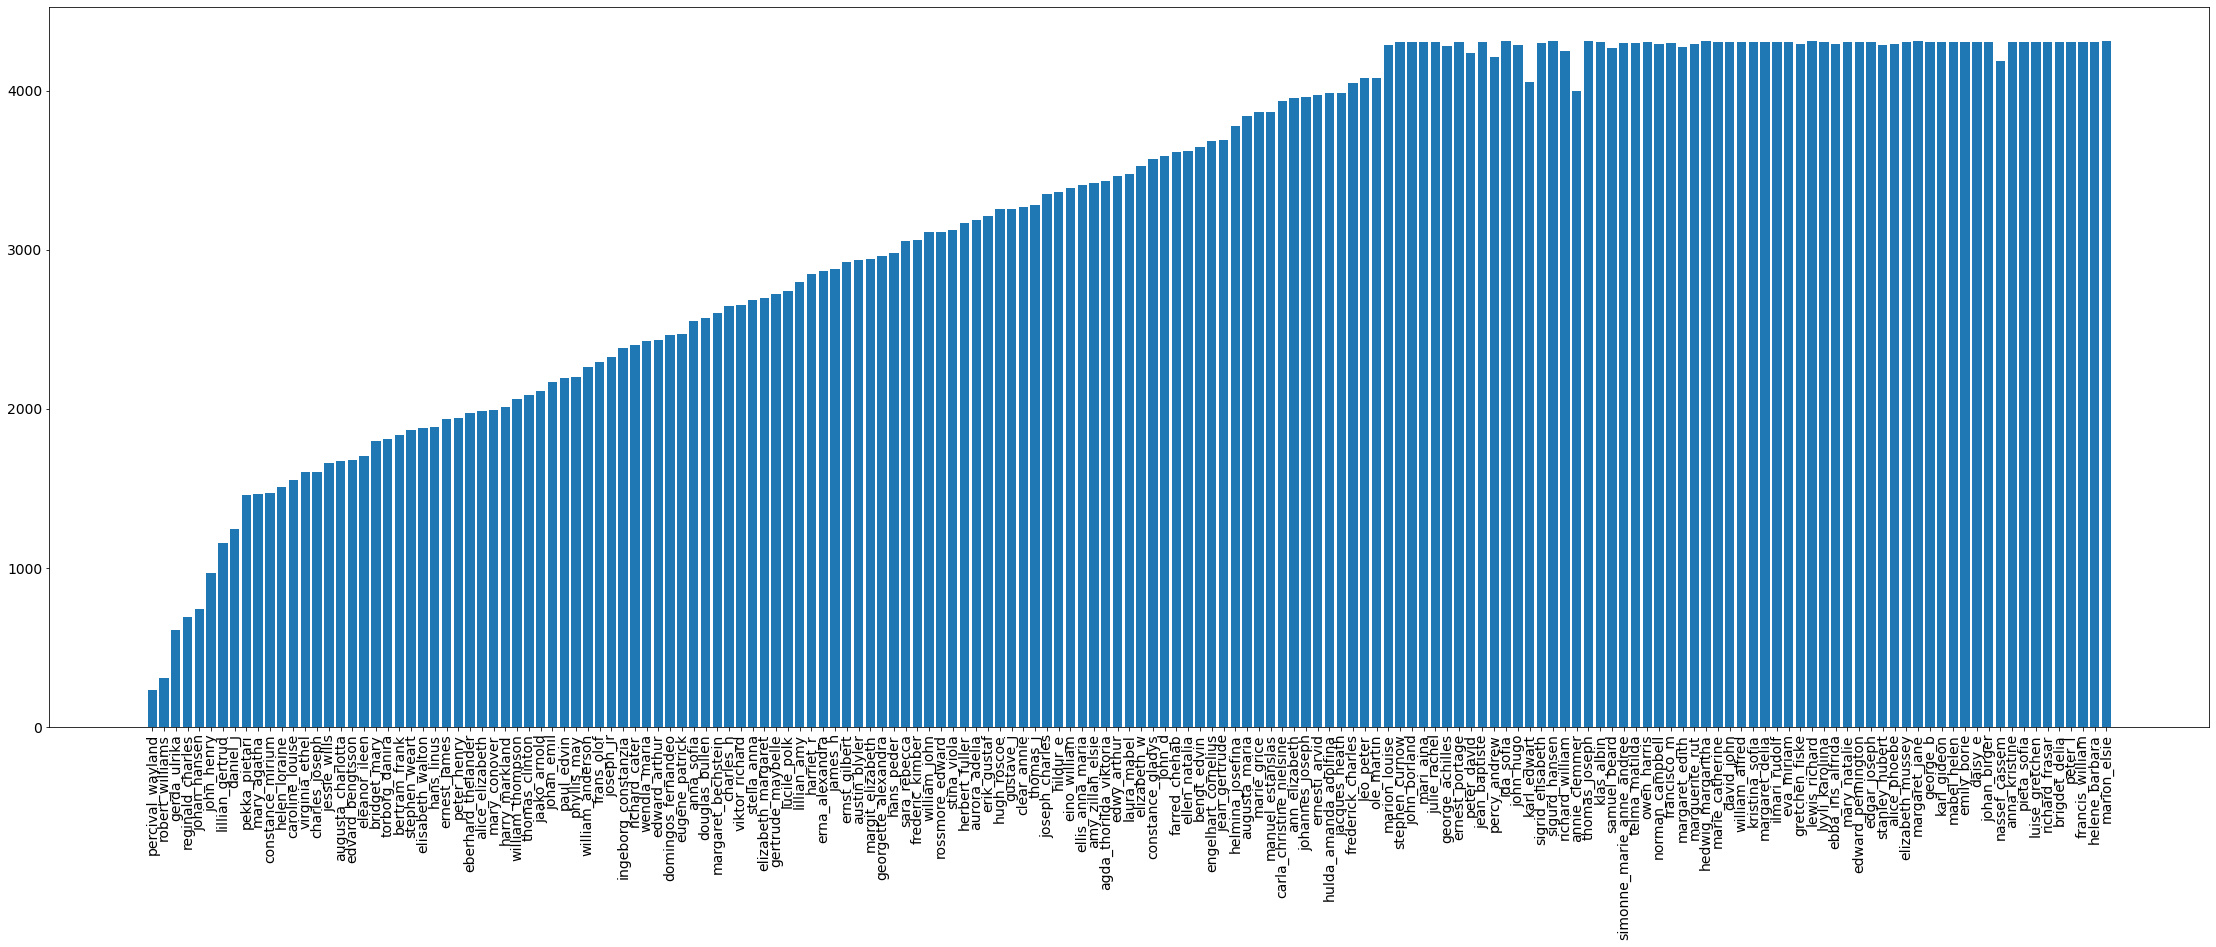

In [ ]:
fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
ax.bar(dic.keys(),dic.values())
plt.show()

## Funciones

In [ ]:
def submit(y_pred,test_directory_list):
  id_list = []
  expected_list = []
  for wav_test,pred in zip(test_directory_list,y_pred):
    id_list.append(wav_test)
    expected_list.append(pred[0])
  d = {'Id': id_list, 'Expected': expected_list}
  df_output = pd.DataFrame(data=d)
  return df_output

## Solamente sacando el silencio

In [ ]:
def extract_features(data,sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0) #cuenta cambios de signo
    result=np.hstack((result, zcr)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(data,sample_rate):    
    # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    return result

In [ ]:
X, Y = [], []
cantidad_wav = 0
for interlocutor in interlocutores:
  path = new_train_dir + '/' + interlocutor
  path_directory_list = os.listdir(path)
  for wav in path_directory_list:
    cantidad_wav += 1
    path_wav = path + '/' + wav
    audio, sr = librosa.load(path_wav)
    #features = wav_a_mel_spectrogram(audio)
    features = get_features(audio,sr)
    #for fea in features:
    #print(len(features[0]))
    X.append(features)
    Y.append(interlocutor)

In [ ]:
print(len(X), len(Y), cantidad_wav)

2214 2214 2214


In [ ]:
df = pd.DataFrame(X)
df['labels'] = Y
df.to_csv('features_sin_silencio.csv', index=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,labels
0,0.077074,0.044991,0.041560,0.041102,0.050447,0.142599,0.986756,9.976851,50.237537,144.582001,...,1.981835e-06,1.799678e-06,1.673319e-06,1.579241e-06,1.509523e-06,1.458842e-06,1.420160e-06,1.393482e-06,1.377455e-06,amy_zillah_elsie
1,0.085427,0.113664,0.010532,0.002060,0.001079,0.001307,0.005570,0.054703,0.348414,1.199619,...,2.034684e-07,1.959658e-07,1.899144e-07,1.852189e-07,1.812245e-07,1.782049e-07,1.750463e-07,1.733281e-07,1.720542e-07,amy_zillah_elsie
2,0.110869,0.008598,0.010747,0.008696,0.008987,0.021372,0.132428,1.449746,4.551908,17.071213,...,6.516280e-06,5.952015e-06,5.518197e-06,5.167542e-06,4.897547e-06,4.676845e-06,4.515625e-06,4.398025e-06,4.330853e-06,amy_zillah_elsie
3,0.117386,1.577079,0.084042,0.041527,0.066679,0.276554,0.921839,6.201375,25.119164,54.259983,...,1.224755e-06,1.142835e-06,1.084643e-06,1.041478e-06,1.006920e-06,9.822739e-07,9.640002e-07,9.515230e-07,9.422268e-07,amy_zillah_elsie
4,0.065202,0.113803,0.012640,0.005017,0.005091,0.010978,0.142567,4.127042,28.495939,58.470631,...,1.169524e-06,1.118428e-06,1.077711e-06,1.042204e-06,1.013165e-06,9.907882e-07,9.739844e-07,9.614905e-07,9.531812e-07,alice_elizabeth


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_taller_2/features/features_sin_silencio.csv')

In [ ]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1660, 129) (1660, 167) (554, 129) (554, 167)
(1660, 129, 1) (1660, 167) (554, 129, 1) (554, 167)


In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=167, activation='softmax')) #numero de clases 
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 129, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 65, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 65, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 33, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 33, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 17, 128)         

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
26/26 [==============================] - 13s 35ms/step - loss: 5.1029 - accuracy: 0.0337 - val_loss: 5.0367 - val_accuracy: 0.0487 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 11ms/step - loss: 4.9652 - accuracy: 0.0434 - val_loss: 4.9069 - val_accuracy: 0.0523 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 12ms/step - loss: 4.7943 - accuracy: 0.0512 - val_loss: 4.7669 - val_accuracy: 0.0487 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 4.6719 - accuracy: 0.0578 - val_loss: 4.7139 - val_accuracy: 0.0704 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 11ms/step - loss: 4.5433 - accuracy: 0.0789 - val_loss: 4.6205 - val_accuracy: 0.0848 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 12ms/step - loss: 4.4359 - accuracy: 0.0928 - val_loss: 4.5841 - val_accuracy: 0.0939 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 11ms/step - loss: 4.

18/18 [==============================] - 0s 14ms/step - loss: 4.4806 - accuracy: 0.3664
Accuracy of our model on test data :  36.64259910583496 %


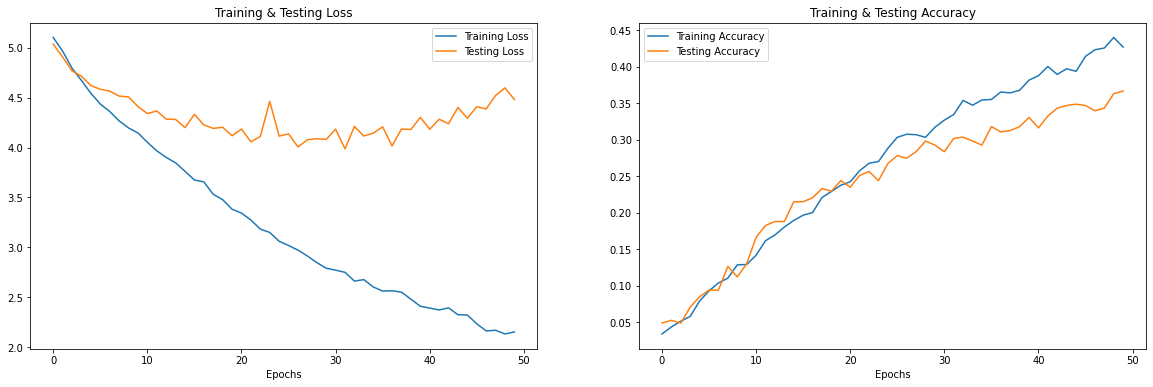

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

ValueError: ignored

<Figure size 864x720 with 0 Axes>

In [ ]:
len(np.unique([y_test,y_pred]))

148

### 1er submit

In [ ]:
x_test = []
cantidad_wav_test = 0
for wav_test in test_directory_list:
    cantidad_wav_test += 1
    path_wav = new_test_dir + '/' + wav_test
    audio, sr = librosa.load(path_wav)
    features = get_features(audio,sr)
    x_test.append(features)

In [ ]:
print(len(x_test), len(test_directory_list))

957 957


In [ ]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

# splitting data
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=0, shuffle=True)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape)

(1660, 129) (1660, 167) (554, 129) (554, 167)
(1660, 129, 1) (1660, 167) (554, 129) (554, 167) (957, 129, 1)


In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=167, activation='softmax')) #numero de clases 
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 129, 256)          1536      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 65, 256)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 65, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 33, 256)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 33, 128)           163968    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 17, 128)         

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val), callbacks=[rlrp])

Epoch 1/50
26/26 [==============================] - 2s 32ms/step - loss: 5.0787 - accuracy: 0.0163 - val_loss: 6.6911 - val_accuracy: 0.0289 - lr: 0.0010
Epoch 2/50
26/26 [==============================] - 0s 16ms/step - loss: 4.9163 - accuracy: 0.0313 - val_loss: 13.3942 - val_accuracy: 0.0289 - lr: 0.0010
Epoch 3/50
26/26 [==============================] - 0s 15ms/step - loss: 4.7473 - accuracy: 0.0572 - val_loss: 19.7299 - val_accuracy: 0.0090 - lr: 0.0010
Epoch 4/50
26/26 [==============================] - 0s 14ms/step - loss: 4.6393 - accuracy: 0.0524 - val_loss: 30.4207 - val_accuracy: 0.0271 - lr: 0.0010
Epoch 5/50
26/26 [==============================] - 0s 13ms/step - loss: 4.5492 - accuracy: 0.0801 - val_loss: 34.6298 - val_accuracy: 0.0253 - lr: 0.0010
Epoch 6/50
26/26 [==============================] - 0s 16ms/step - loss: 4.4933 - accuracy: 0.0910 - val_loss: 27.8284 - val_accuracy: 0.0253 - lr: 0.0010
Epoch 7/50
26/26 [==============================] - 0s 14ms/step - loss

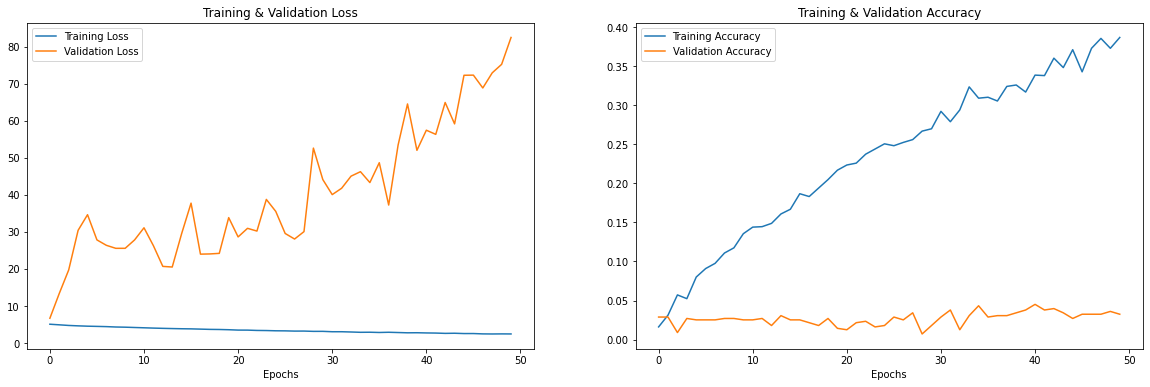

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

In [ ]:
df_output = submit(y_pred,test_directory_list)

In [ ]:
df_output.to_csv('submit1.csv', index=False)

## Sin silencio y con Data Augmentation

In [ ]:
X, Y = [], []
cantidad_wav = 0
for interlocutor in interlocutores:
  path = new_train_dir + '/' + interlocutor
  path_directory_list = os.listdir(path)
  for wav in path_directory_list:
    cantidad_wav += 1
    path_wav = path + '/' + wav
    audio, sr = librosa.load(path_wav)
    features = get_features(audio,sr)
    X.append(features)
    Y.append(interlocutor)

In [ ]:
print(len(X), len(Y), cantidad_wav)

10055 10055 10055


In [ ]:
df = pd.DataFrame(X)
df['labels'] = Y
df.to_csv('features_sin_silencio_data_augmentation.csv', index=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,labels
0,0.077074,0.044991,0.041560,0.041102,0.050447,0.142599,0.986756,9.976851,50.237537,144.582001,...,1.981835e-06,1.799678e-06,1.673319e-06,1.579241e-06,1.509523e-06,1.458842e-06,1.420160e-06,1.393482e-06,1.377455e-06,amy_zillah_elsie
1,0.085427,0.113664,0.010532,0.002060,0.001079,0.001307,0.005570,0.054703,0.348414,1.199619,...,2.034684e-07,1.959658e-07,1.899144e-07,1.852189e-07,1.812245e-07,1.782049e-07,1.750463e-07,1.733281e-07,1.720542e-07,amy_zillah_elsie
2,0.110869,0.008598,0.010747,0.008696,0.008987,0.021372,0.132428,1.449746,4.551908,17.071213,...,6.516280e-06,5.952015e-06,5.518197e-06,5.167542e-06,4.897547e-06,4.676845e-06,4.515625e-06,4.398025e-06,4.330853e-06,amy_zillah_elsie
3,0.117386,1.577079,0.084042,0.041527,0.066679,0.276554,0.921839,6.201375,25.119164,54.259983,...,1.224755e-06,1.142835e-06,1.084643e-06,1.041478e-06,1.006920e-06,9.822739e-07,9.640002e-07,9.515230e-07,9.422268e-07,amy_zillah_elsie
4,0.081361,0.019927,0.018813,0.017844,0.021131,0.049153,0.256454,2.690403,16.335634,48.262299,...,8.855795e-07,7.853635e-07,7.316667e-07,6.879050e-07,6.370149e-07,6.041908e-07,4.484709e-07,1.582980e-07,2.482014e-08,amy_zillah_elsie


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_taller_2/features/features_sin_silencio_data_augmentation.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,labels
0,0.077074,0.044991,0.041560,0.041102,0.050447,0.142599,0.986756,9.976851,50.237537,144.582001,...,1.981835e-06,1.799678e-06,1.673319e-06,1.579241e-06,1.509523e-06,1.458842e-06,1.420160e-06,1.393482e-06,1.377455e-06,amy_zillah_elsie
1,0.085427,0.113664,0.010532,0.002060,0.001079,0.001307,0.005570,0.054703,0.348414,1.199619,...,2.034684e-07,1.959658e-07,1.899144e-07,1.852189e-07,1.812245e-07,1.782049e-07,1.750463e-07,1.733281e-07,1.720542e-07,amy_zillah_elsie
2,0.110869,0.008598,0.010747,0.008696,0.008987,0.021372,0.132428,1.449746,4.551908,17.071213,...,6.516280e-06,5.952015e-06,5.518197e-06,5.167542e-06,4.897547e-06,4.676845e-06,4.515625e-06,4.398025e-06,4.330853e-06,amy_zillah_elsie
3,0.117386,1.577079,0.084042,0.041527,0.066679,0.276554,0.921839,6.201375,25.119164,54.259983,...,1.224755e-06,1.142835e-06,1.084643e-06,1.041478e-06,1.006920e-06,9.822739e-07,9.640002e-07,9.515230e-07,9.422268e-07,amy_zillah_elsie
4,0.081361,0.019927,0.018813,0.017844,0.021131,0.049153,0.256454,2.690403,16.335634,48.262299,...,8.855795e-07,7.853635e-07,7.316667e-07,6.879050e-07,6.370149e-07,6.041908e-07,4.484709e-07,1.582980e-07,2.482014e-08,amy_zillah_elsie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,0.089524,0.027659,0.027235,0.031416,0.215524,4.330220,11.331253,11.487127,8.946712,15.494518,...,2.787482e-03,2.800869e-03,2.777692e-03,2.772478e-03,2.774300e-03,2.719329e-03,2.740361e-03,2.739714e-03,2.744790e-03,william_anderson
10051,0.071231,0.011809,0.010598,0.010781,0.065868,1.444917,4.573671,5.226465,3.300098,5.898495,...,2.683329e-07,2.503876e-07,2.548540e-07,2.336304e-07,2.330241e-07,2.211441e-07,1.495597e-07,6.096005e-08,1.100047e-08,william_anderson
10052,0.068467,0.020111,0.020002,0.022461,0.173317,3.868300,10.178685,7.713475,6.675501,13.486981,...,3.866338e-07,3.728085e-07,3.436485e-07,3.333480e-07,3.223465e-07,3.213862e-07,3.192823e-07,3.148386e-07,3.095888e-07,william_anderson
10053,0.085416,0.837398,0.101132,0.027192,0.019959,0.161907,2.289369,12.977393,25.044746,29.717937,...,1.402453e-05,1.305804e-05,1.238861e-05,1.204163e-05,1.165574e-05,1.077527e-05,9.295469e-06,6.049623e-06,4.298235e-06,william_anderson


In [ ]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7541, 129) (7541, 167) (2514, 129) (2514, 167)
(7541, 129, 1) (7541, 167) (2514, 129, 1) (2514, 167)


In [ ]:
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=167, activation='softmax')) #numero de clases 
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 129, 512)          3072      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 65, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 256)           655616    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 33, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 33, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 17, 128)          0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2)
history=model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/80
118/118 [==============================] - 16s 18ms/step - loss: 5.0213 - accuracy: 0.0305 - val_loss: 4.8741 - val_accuracy: 0.0426 - lr: 0.0010
Epoch 2/80
118/118 [==============================] - 2s 14ms/step - loss: 4.7990 - accuracy: 0.0475 - val_loss: 4.6694 - val_accuracy: 0.0569 - lr: 0.0010
Epoch 3/80
118/118 [==============================] - 2s 14ms/step - loss: 4.6153 - accuracy: 0.0606 - val_loss: 4.4376 - val_accuracy: 0.0859 - lr: 0.0010
Epoch 4/80
118/118 [==============================] - 2s 14ms/step - loss: 4.4099 - accuracy: 0.0822 - val_loss: 4.2321 - val_accuracy: 0.0963 - lr: 0.0010
Epoch 5/80
118/118 [==============================] - 2s 13ms/step - loss: 4.2152 - accuracy: 0.1058 - val_loss: 4.0412 - val_accuracy: 0.1472 - lr: 0.0010
Epoch 6/80
118/118 [==============================] - 2s 14ms/step - loss: 4.0416 - accuracy: 0.1247 - val_loss: 3.8268 - val_accuracy: 0.1675 - lr: 0.0010
Epoch 7/80
118/118 [==============================] - 2s 13ms/s

79/79 [==============================] - 1s 7ms/step - loss: 1.1564 - accuracy: 0.7228
Accuracy of our model on test data :  72.2752571105957 %


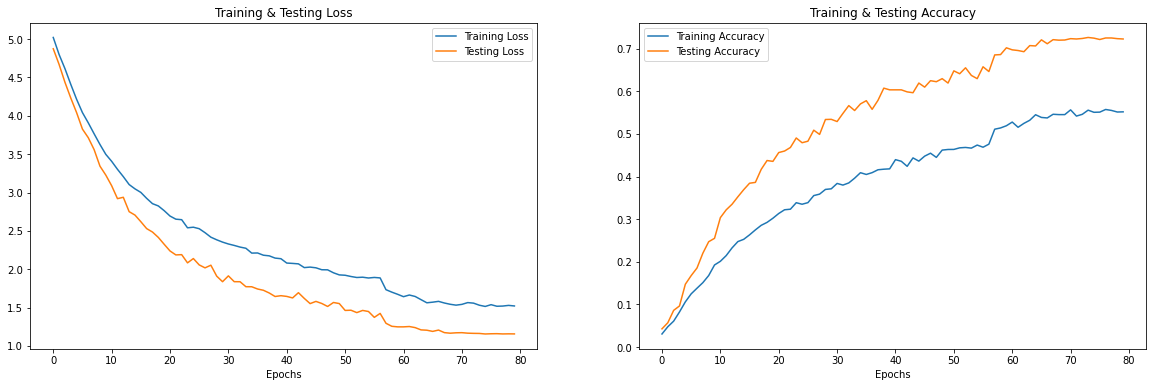

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(80)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

### 2do submit

In [ ]:
x_test = []
cantidad_wav_test = 0
for wav_test in new_test_directory_list:
    cantidad_wav_test += 1
    path_wav = new_test_dir + '/' + wav_test
    audio, sr = librosa.load(path_wav)
    features = get_features(audio,sr)
    x_test.append(features)

In [ ]:
print(len(x_test), len(test_directory_list))

957 957


In [ ]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

# splitting data
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=0, shuffle=True)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape)

(7541, 129) (7541, 167) (2514, 129) (2514, 167)
(7541, 129, 1) (7541, 167) (2514, 129) (2514, 167) (957, 129, 1)


In [ ]:
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=167, activation='softmax')) #numero de clases 
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 129, 512)          3072      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 65, 512)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 65, 256)           655616    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 33, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 33, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 17, 128)         

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2)
history=model.fit(x_train, y_train, batch_size=64, epochs=80, validation_data=(x_val, y_val), callbacks=[rlrp])

Epoch 1/80
118/118 [==============================] - 3s 17ms/step - loss: 5.0224 - accuracy: 0.0261 - val_loss: 23.3193 - val_accuracy: 0.0183 - lr: 0.0010
Epoch 2/80
118/118 [==============================] - 2s 13ms/step - loss: 4.7768 - accuracy: 0.0491 - val_loss: 13.0679 - val_accuracy: 0.0203 - lr: 0.0010
Epoch 3/80
118/118 [==============================] - 2s 20ms/step - loss: 4.5109 - accuracy: 0.0713 - val_loss: 15.4252 - val_accuracy: 0.0135 - lr: 0.0010
Epoch 4/80
118/118 [==============================] - 2s 18ms/step - loss: 4.2738 - accuracy: 0.0949 - val_loss: 19.1068 - val_accuracy: 0.0282 - lr: 0.0010
Epoch 5/80
118/118 [==============================] - 2s 17ms/step - loss: 4.0454 - accuracy: 0.1195 - val_loss: 26.4968 - val_accuracy: 0.0135 - lr: 0.0010
Epoch 6/80
118/118 [==============================] - 2s 19ms/step - loss: 3.8304 - accuracy: 0.1441 - val_loss: 26.8623 - val_accuracy: 0.0171 - lr: 0.0010
Epoch 7/80
118/118 [==============================] - 2s 2

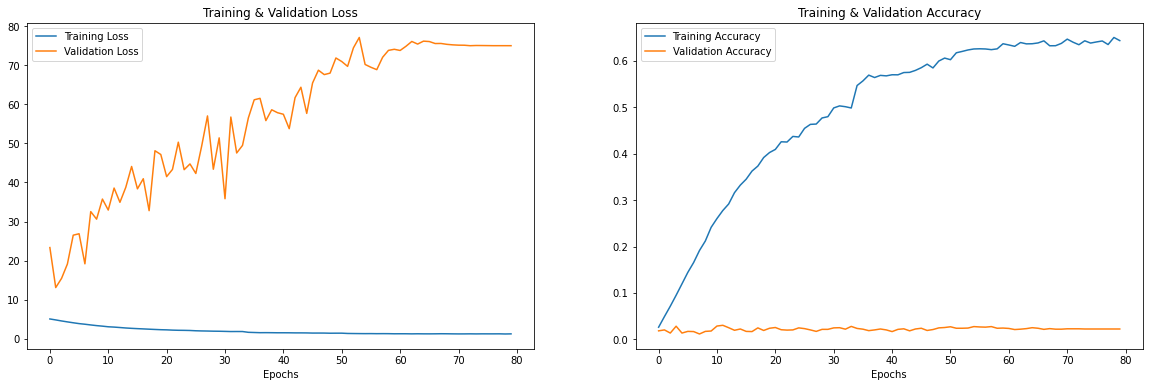

In [ ]:
epochs = [i for i in range(80)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

In [ ]:
df_output = submit(y_pred,new_test_directory_list)

In [ ]:
df_output.to_csv('submit2.csv', index=False)